In [34]:
import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
from datetime import date, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
covid_data = os.path.abspath(os.path.join('/Users/afilisetti/Documents/git-projects/COVID-19/'))
if covid_data not in sys.path:
    sys.path.append(covid_data)
    
# DATA --> https://github.com/pcm-dpc/COVID-19

# Province Data

In [35]:
cities_data_json_uri = "/Users/afilisetti/Documents/git-projects/COVID-19/dati-json/dpc-covid19-ita-province.json"

In [36]:
cities_data_json = pd.read_json(cities_data_json_uri)
cities_data_json["data"] = pd.to_datetime(cities_data_json["data"]).dt.strftime('%Y-%m-%d')

In [37]:
cities_data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3456 entries, 0 to 3455
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   data                     3456 non-null   object 
 1   stato                    3456 non-null   object 
 2   codice_regione           3456 non-null   int64  
 3   denominazione_regione    3456 non-null   object 
 4   codice_provincia         3456 non-null   int64  
 5   denominazione_provincia  3456 non-null   object 
 6   sigla_provincia          3456 non-null   object 
 7   lat                      3456 non-null   float64
 8   long                     3456 non-null   float64
 9   totale_casi              3456 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 270.1+ KB


In [38]:
cities_data_json.head(5)

data stato  codice_regione denominazione_regione  codice_provincia  \
0  2020-02-24   ITA              13               Abruzzo                69   
1  2020-02-24   ITA              13               Abruzzo                66   
2  2020-02-24   ITA              13               Abruzzo                68   
3  2020-02-24   ITA              13               Abruzzo                67   
4  2020-02-24   ITA              13               Abruzzo               979   

                denominazione_provincia sigla_provincia        lat       long  \
0                                Chieti              CH  42.351032  14.167546   
1                              L'Aquila              AQ  42.351222  13.398438   
2                               Pescara              PE  42.464584  14.213648   
3                                Teramo              TE  42.658918  13.704400   
4  In fase di definizione/aggiornamento                   0.000000   0.000000   

   totale_casi  
0            0  
1            0  
2            0  
3            0  
4            0

# Regions Data

In [108]:
regions_data_json_uri = "/Users/afilisetti/Documents/git-projects/COVID-19/dati-json/dpc-covid19-ita-regioni.json"
regions_data_json = pd.read_json(regions_data_json_uri)
regions_data_json["data"] = pd.to_datetime(regions_data_json["data"]).dt.strftime('%Y-%m-%d')
regions_data_json["ratio_positivi"] = regions_data_json["nuovi_attualmente_positivi"] / regions_data_json["tamponi"] 
regions_data_json["mortality"] = regions_data_json["deceduti"] / regions_data_json["totale_casi"] 

In [109]:
regions_data_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   data                         567 non-null    object 
 1   stato                        567 non-null    object 
 2   codice_regione               567 non-null    int64  
 3   denominazione_regione        567 non-null    object 
 4   lat                          567 non-null    float64
 5   long                         567 non-null    float64
 6   ricoverati_con_sintomi       567 non-null    int64  
 7   terapia_intensiva            567 non-null    int64  
 8   totale_ospedalizzati         567 non-null    int64  
 9   isolamento_domiciliare       567 non-null    int64  
 10  totale_attualmente_positivi  567 non-null    int64  
 11  nuovi_attualmente_positivi   567 non-null    int64  
 12  dimessi_guariti              567 non-null    int64  
 13  deceduti            

In [44]:
regions_data_json.head(5)

data stato  codice_regione denominazione_regione        lat  \
0  2020-02-24   ITA              13               Abruzzo  42.351222   
1  2020-02-24   ITA              17            Basilicata  40.639471   
2  2020-02-24   ITA               4          P.A. Bolzano  46.499335   
3  2020-02-24   ITA              18              Calabria  38.905976   
4  2020-02-24   ITA              15              Campania  40.839566   

        long  ricoverati_con_sintomi  terapia_intensiva  totale_ospedalizzati  \
0  13.398438                       0                  0                     0   
1  15.805148                       0                  0                     0   
2  11.356624                       0                  0                     0   
3  16.594402                       0                  0                     0   
4  14.250850                       0                  0                     0   

   isolamento_domiciliare  totale_attualmente_positivi  \
0                       0                            0   
1                       0                            0   
2                       0                            0   
3                       0                            0   
4                       0                            0   

   nuovi_attualmente_positivi  dimessi_guariti  deceduti  totale_casi  \
0                           0                0         0            0   
1                           0                0         0            0   
2                           0                0         0            0   
3                           0                0         0            0   
4                           0                0         0            0   

   tamponi  ratio_positivi  
0        5             0.0  
1        0             NaN  
2        1             0.0  
3        1             0.0  
4       10             0.0

# Supporting Functions

In [97]:
def get_cities_from_regions(region):
    cities = list(set(cities_data_json.loc[(cities_data_json['denominazione_regione']==region) &
                                           (cities_data_json['denominazione_provincia']!='In fase di definizione/aggiornamento')]['denominazione_provincia']))
    return cities

In [46]:
def plot_regions(data, data_filter, y='totale_casi'):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    ax = sns.lineplot(x="data",
                      y=y,
                      hue="denominazione_regione",
                      data=data.query(f"denominazione_regione in {data_filter}"),
                      linestyle='dotted',
                      marker="o"
                     )
    plt.subplot(1,2,2)
    bx = sns.lineplot(x="data",
                      y=y,
                      hue="denominazione_regione",
                      markers=True,
                      dashes=True,
                      data=data.query(f"denominazione_regione in {data_filter}"),
                      linestyle='dotted',
                      marker="o"
                     )
    bx.set_yscale("log")
    bx.set_ylabel(f"log({y})")
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    bx.set_xticklabels(bx.get_xticklabels(), rotation=90);  

In [47]:
def plot_region(region, data_json):
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    ax = sns.lineplot(x="data",
                      y="totale_casi",
                      hue="sigla_provincia",
                      linestyle='dotted',
                      marker="o",
                      data=data_json.query(f"denominazione_regione == '{region}'"), 
                     )
    plt.subplot(1,2,2)
    ax.set_ylabel("Totale Cases")
    bx = sns.lineplot(x="data",
                      y="totale_casi",
                      hue="sigla_provincia",
                      linestyle='dotted',
                      marker="o",
                      data=data_json.query(f"denominazione_regione == '{region}'"),
                     )
    bx.set_yscale('log')
    bx.set_ylabel("log(Total Cases)")
    plt.draw()
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90);
    bx.set_xticklabels(bx.get_xticklabels(), rotation=90); 

In [110]:
def plot_region_indicators(regions_area):
    plot_regions(cities_data_json, regions_area, 'totale_casi')
    plot_regions(regions_data_json, regions_area, 'totale_casi')
    plot_regions(regions_data_json, regions_area, 'deceduti')
    plot_regions(regions_data_json, regions_area, 'terapia_intensiva')
    plot_regions(regions_data_json, regions_area, 'tamponi')
    plot_regions(regions_data_json, regions_area, 'mortality')
    plot_regions(regions_data_json, regions_area, 'ratio_positivi')

In [111]:
def growth_rate(city, avg_growth_rate_window=AVG_GROWTH_RATE_WINDOW):
    data_city = data_json.loc[data_json['sigla_provincia']==city]
    growth_rate = list()
    for idx, i in enumerate(data_city['totale_casi']):
        if idx > 0:
            if list(data_city['totale_casi'])[idx-1] > 0:
                growth_rate.append(i /list(data_city['totale_casi'])[idx-1])

    avg_gr = list()
    for idx, g in enumerate(growth_rate[0:len(growth_rate)-avg_growth_rate_window]):
        avg_gr.append(np.mean(growth_rate[idx:idx+avg_growth_rate_window]))
        
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    ax = plt.plot(growth_rate[2:], linestyle='dotted', marker="o")
    plt.xlabel("Days from 26/2");
    plt.ylabel("Growth rate (%)");
    plt.title(f"Daily Growth Rate ({city})");
    plt.subplot(1,2,2)
    plt.plot(avg_gr, linestyle='dotted', marker="o")
    plt.xlabel(f"Average growth rate (Floating window: {avg_growth_rate_window} days)");
    plt.ylabel("AVG Growth rate (%)");
    plt.title(f"AVG Daily Growth Rate ({city})");
    

In [112]:
def growth_rates(data,
                 areas,
                 area_target='sigla_provincia',
                 indicator='totale_casi',
                 avg_growth_rate_window=AVG_GROWTH_RATE_WINDOW):
    growth_rates = dict()
    for area in areas:
        data_area = data.loc[data[area_target]==area]
        growth_rate = list()
        growth_rates[area] = dict()
        for idx, i in enumerate(data_area[indicator]):
            if idx > 0:
                if list(data_area[indicator])[idx-1] > 1:
                    temp_gr = i /list(data_area[indicator])[idx-1]
                    growth_rate.append((temp_gr,list(data_area['data'])[idx]))
        
        growth_rates[area]['growth_rate'] = growth_rate
        growth_rate_n, growth_rate_date = zip(*growth_rates[area]['growth_rate'])
        
        avg_gr = list()
        for idx, g in enumerate(growth_rate_n[0:len(growth_rate_n)-avg_growth_rate_window+1]):
            avg_gr.append(np.mean(growth_rate_n[idx:idx+avg_growth_rate_window]))
        
            
        growth_rates[area]['avg_growth_rate'] = avg_gr
        
    plt.figure(figsize=(20,10))
    plt.subplot(1,2,1)
    for area in areas:
        growth_rate_n, growth_rate_date = zip(*growth_rates[area]['growth_rate'])
        ax = plt.plot(
            growth_rate_date[:],
            growth_rate_n[:],
            linestyle='solid',
            marker="o"
        )
        plt.xlabel("Date (data starts from case 0)");
        plt.ylabel("Growth Rate");
        plt.title(f"Daily Growth Rate ({area})");
    plt.legend(areas)
    plt.xticks(rotation=90);
    plt.subplot(1,2,2)
    for area in areas:
        plt.plot(growth_rates[area]['avg_growth_rate'][:], linestyle='solid', marker="o")
        plt.xlabel(f"Average growth Factor (Floating window: {avg_growth_rate_window} days) from case 0");
        plt.ylabel("AVG Growth Factor");
        plt.title(f"AVG Daily Growth Factor ({area})");
    plt.legend(areas)
    plt.draw()

# Params

In [113]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_style("whitegrid")

In [114]:
AVG_GROWTH_RATE_WINDOW = 7

NW_REGIONS = ["Lombardia", "Piemonte", "Valle d'Aosta", "Liguria"]
NE_REGIONS = ["Emilia Romagna", "Veneto", "Friuli Venezia Giulia", "P.A. Bolzano", "P.A. Trento"]
C_REGIONS = ["Lazio", "Toscana", "Umbria", "Marche"]
S_REGIONS = ["Campania", "Abruzzo", "Molise", "Campania", "Puglia", "Basilicata"]
ISLANDS = ["Sicilia", "Sardegna"]

print(get_cities_from_regions("Lombardia"))
CITIES_LOMBARDIA = ['Bergamo', 'Brescia', 'Milano', 'Lodi', 'Monza e della Brianza', 'Sondrio', 'Varese', 'Lecco', 'Pavia', 'Cremona', 'Como', 'Mantova']
print(get_cities_from_regions("Emilia Romagna"))
CITIES_EMILIA = ['Piacenza', "Reggio nell'Emilia", 'Ravenna', 'Ferrara', 'Modena', 'Forlì-Cesena', 'Bologna', 'Parma', 'Rimini']
print(get_cities_from_regions("Veneto"))
CITIES_VENETO = ['Padova', 'Rovigo', 'Treviso', 'Verona', 'Belluno', 'Vicenza', 'Venezia']
print(get_cities_from_regions("Campania"))
CITIES_CAMPANIA = ['Napoli', 'Benevento', 'Avellino', 'Salerno', 'Napoli', 'Caserta']
print(CITIES_CAMPANIA)

today = date.today()# - timedelta(days=1)#).strftime('%Y-%m-%d')
print(f"Date of the analysis: {today.strftime('%Y-%m-%d')}")

['Bergamo', 'Brescia', 'Milano', 'Lodi', 'Monza e della Brianza', 'Sondrio', 'Varese', 'Lecco', 'Pavia', 'Cremona', 'Como', 'Mantova']
["Reggio nell'Emilia", 'Ravenna', 'Ferrara', 'Modena', 'Piacenza', 'Forlì-Cesena', 'Bologna', 'Parma', 'Rimini']
['Rovigo', 'Treviso', 'Verona', 'Belluno', 'Vicenza', 'Venezia', 'Padova']
['Benevento', 'Avellino', 'Salerno', 'Napoli', 'Caserta']
['Napoli', 'Benevento', 'Avellino', 'Salerno', 'Napoli', 'Caserta']
Date of the analysis: 2020-03-21


# Map

In [115]:
# set the filepath and load in a shapefile
fp = "/Users/afilisetti/Documents/git-projects/COVID-19/aree/shp/dpc-covid19-ita-aree.shp"
map_df = gpd.read_file(fp)
today_data_json = cities_data_json.loc[(cities_data_json['data']==today.strftime('%Y-%m-%d')) & (cities_data_json['sigla_provincia'] != "")]

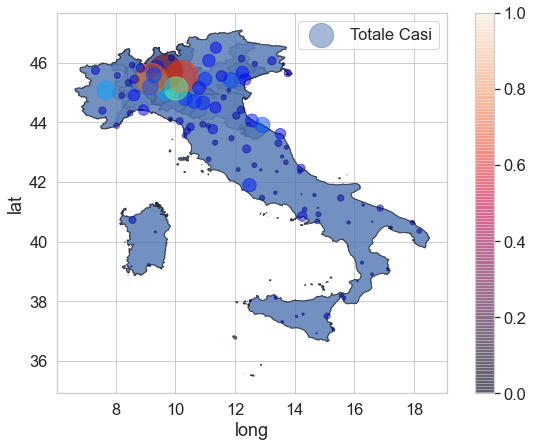

In [116]:
ax = map_df.plot(figsize=(10, 10), alpha=0.4, edgecolor='k');
today_data_json.plot(kind="scatter",
                        x="long",
                        y="lat",
                        alpha=0.5,
                        s=today_data_json["totale_casi"]/5,
                        label="Totale Casi", figsize=(10,7),
                        c=today_data_json["totale_casi"],
                        cmap=plt.get_cmap("jet"), 
                        colorbar=True,
                        ax=ax);

# Region Areas

## North-West Regions

### Trend

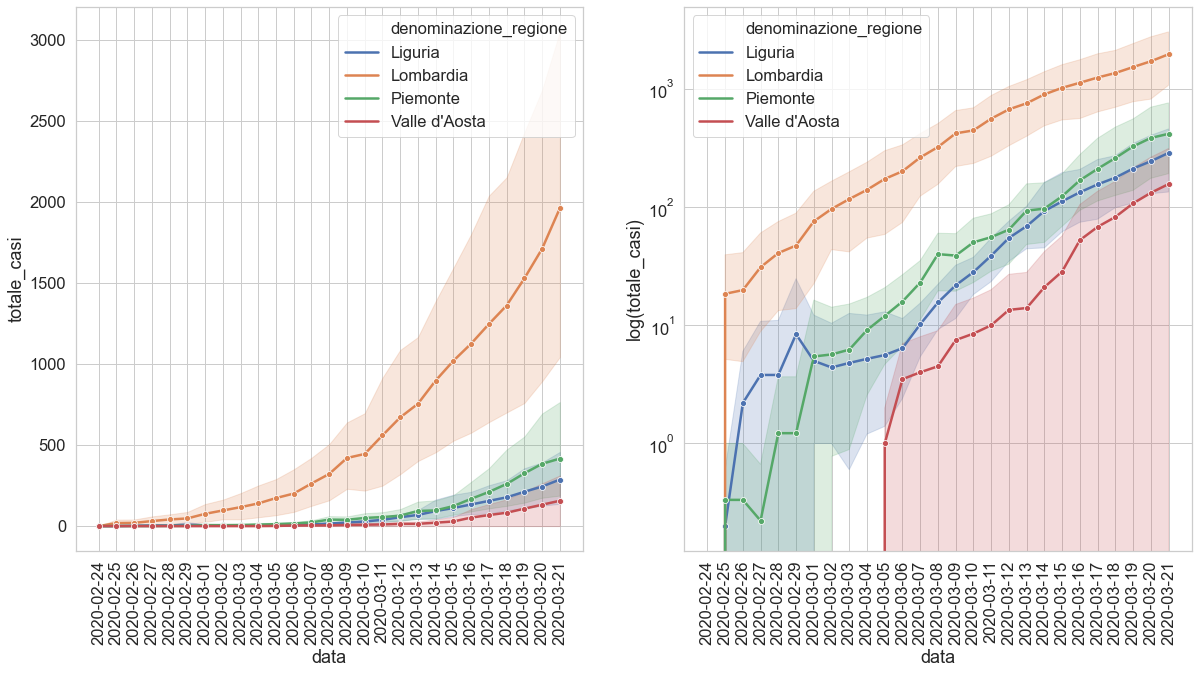

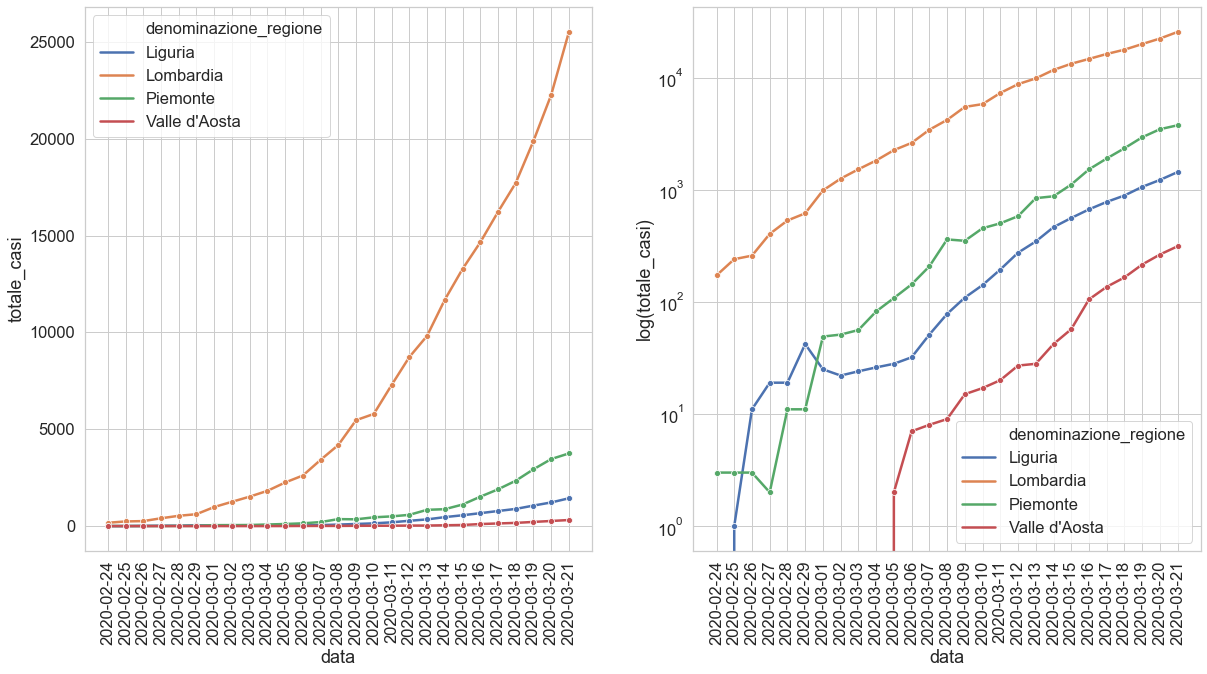

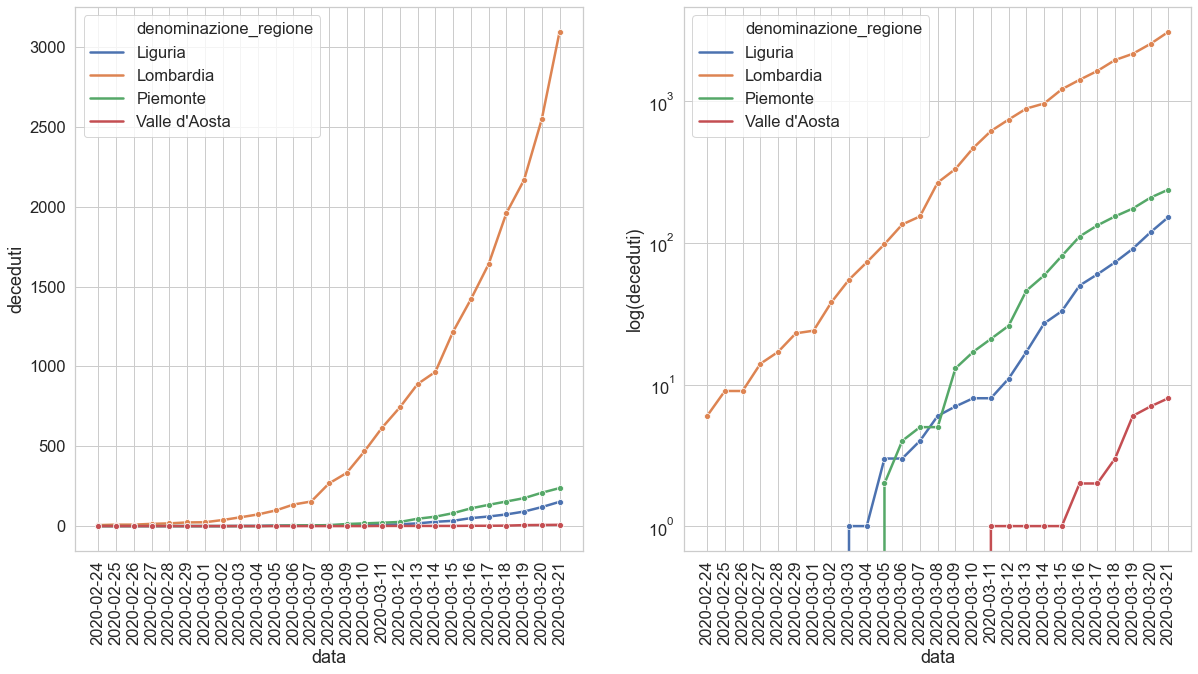

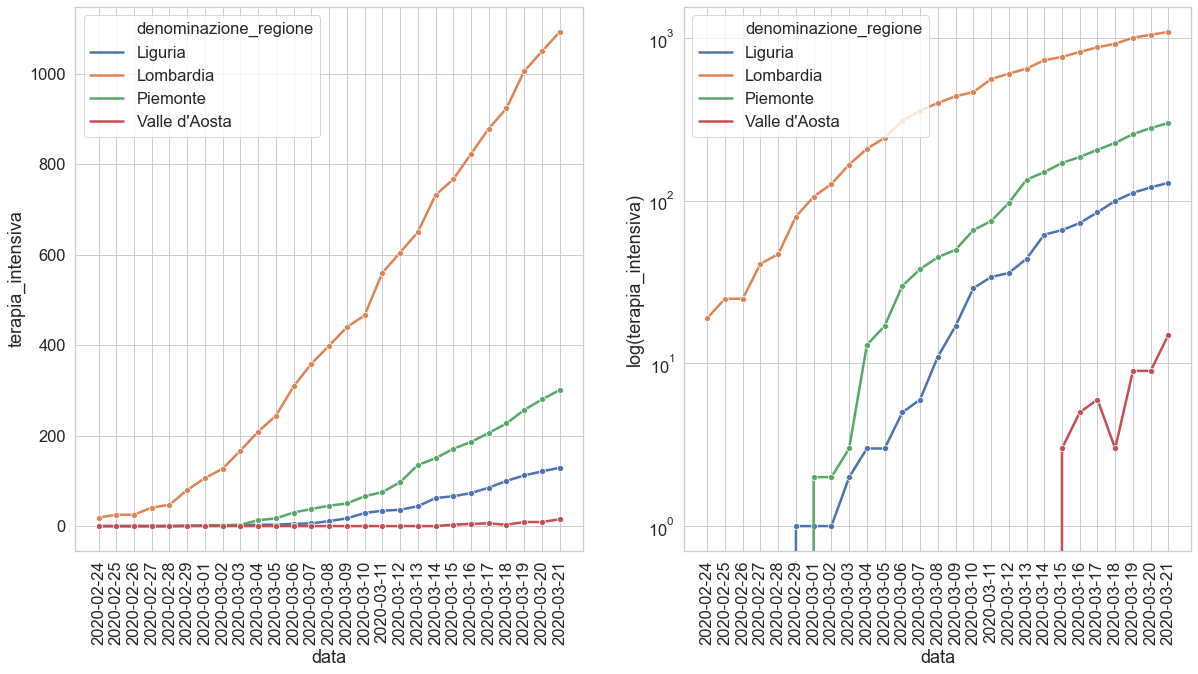

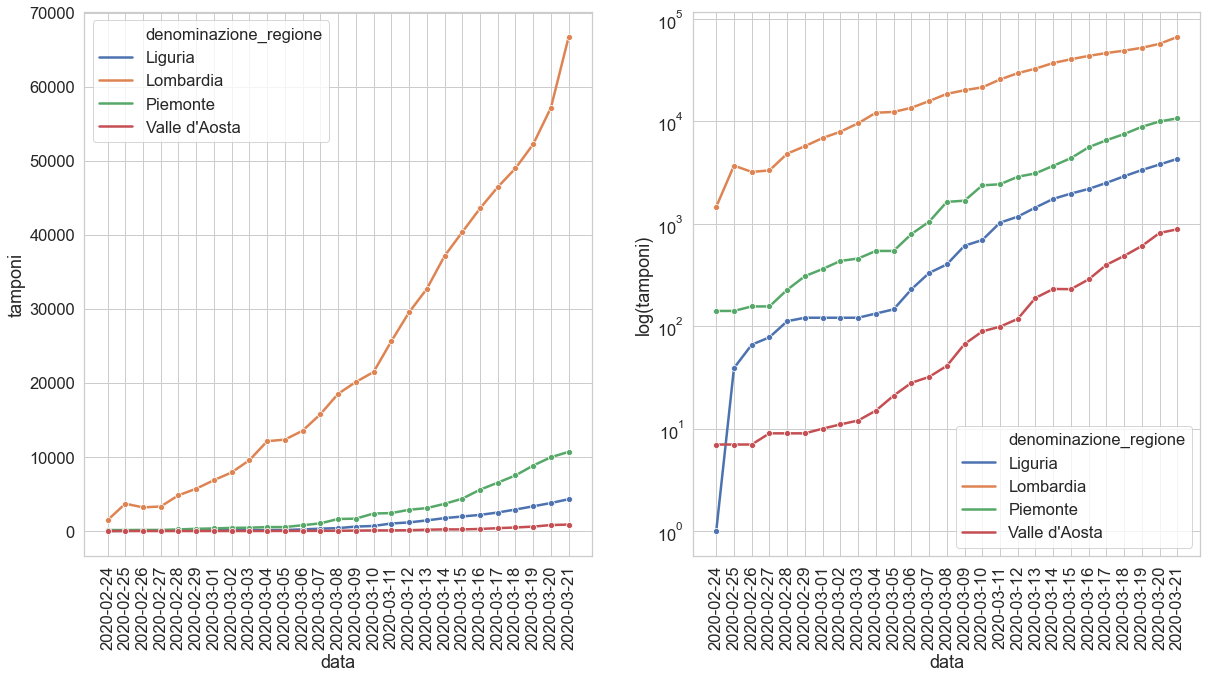

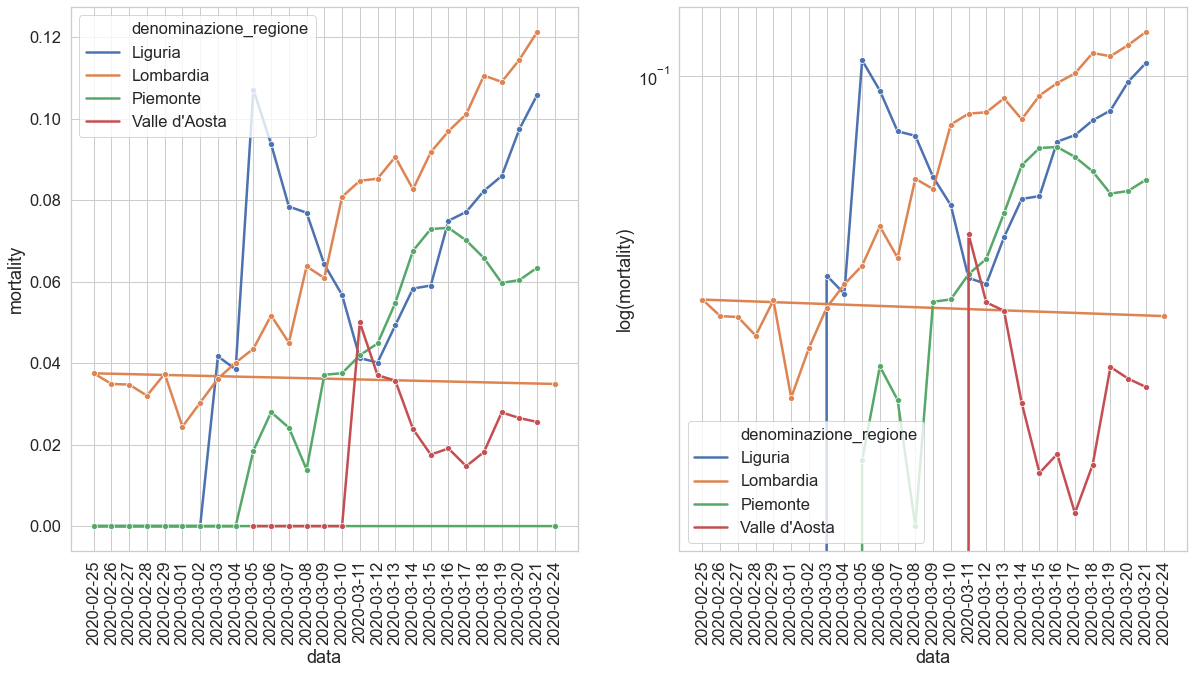

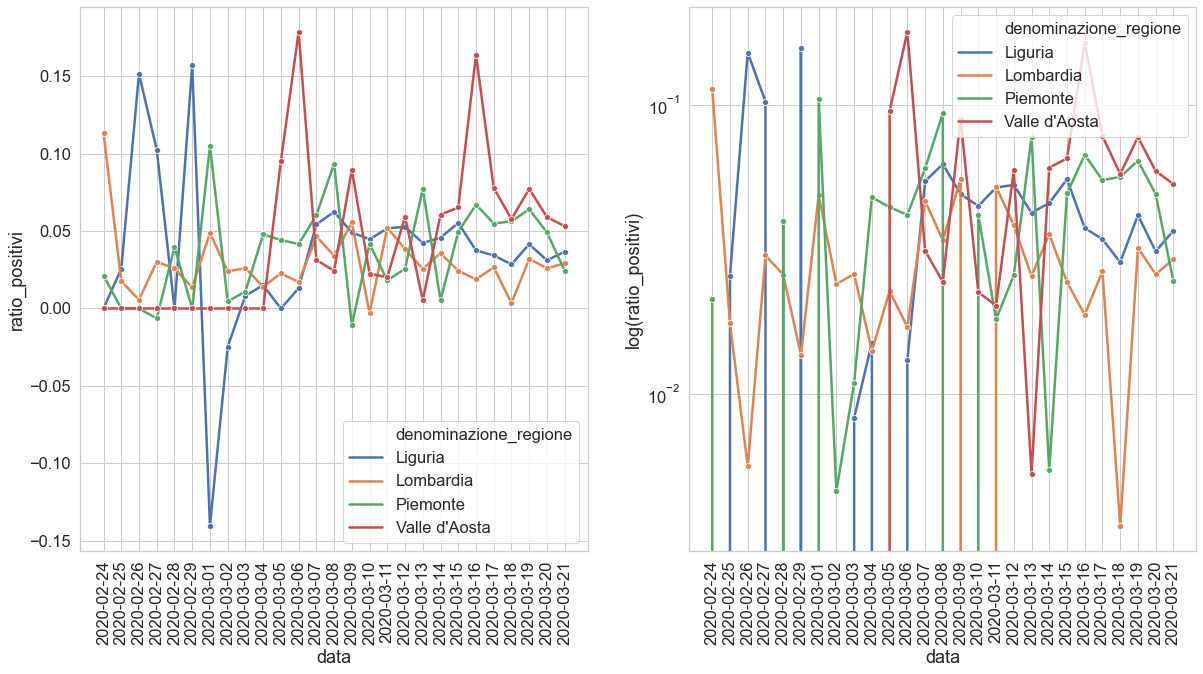

In [117]:
plot_region_indicators(NW_REGIONS)

### Growth Rates

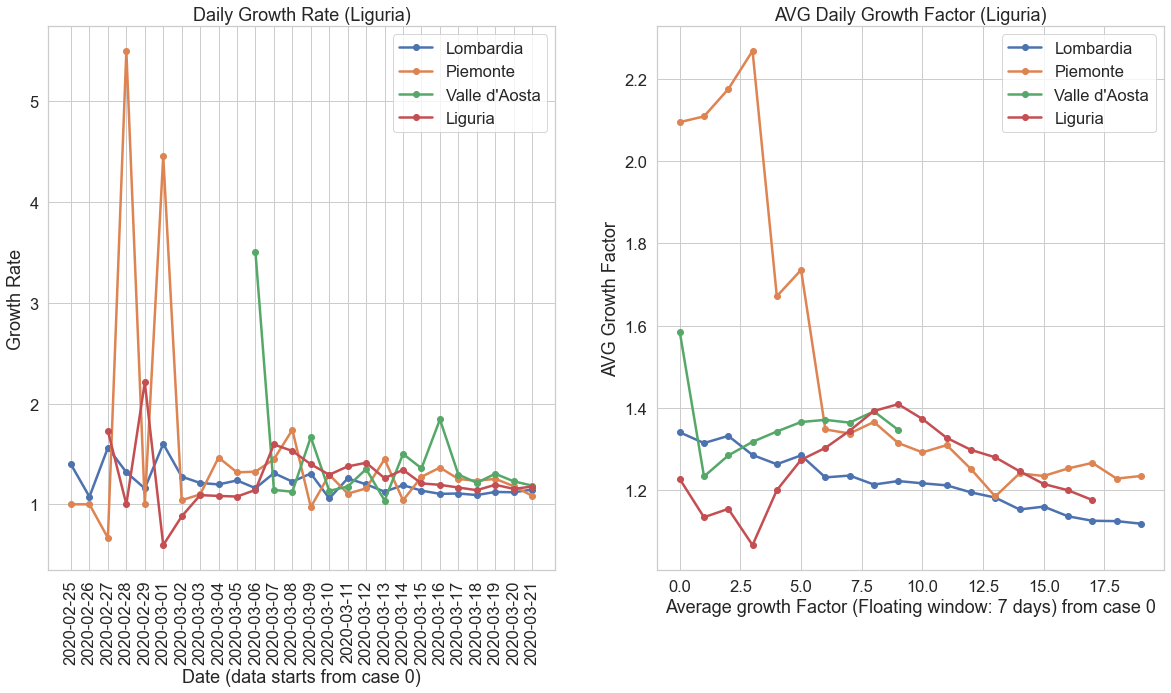

In [118]:
growth_rates(data=regions_data_json,
             areas=NW_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## North-East Regions

### Trend

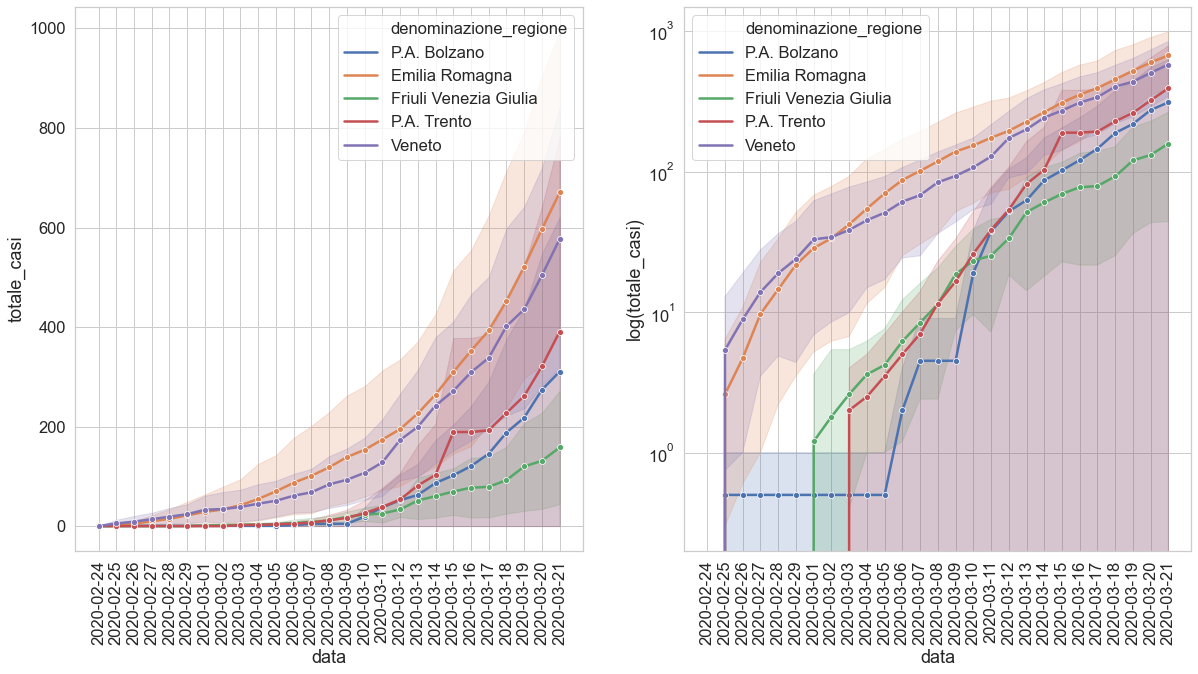

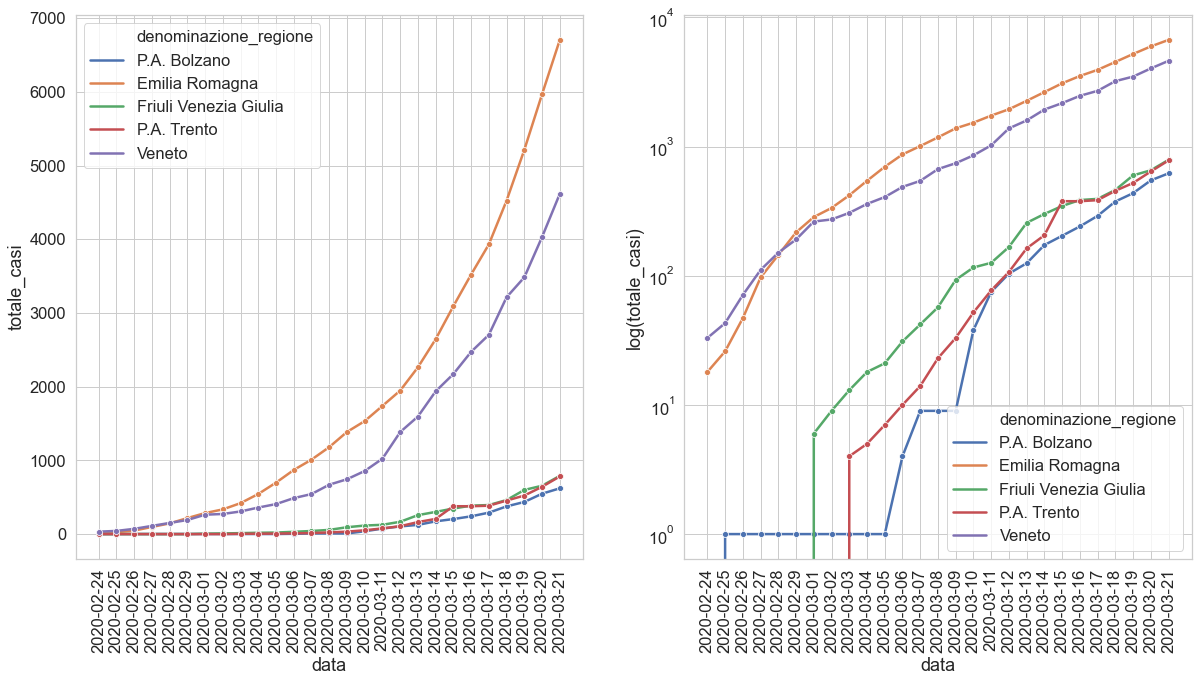

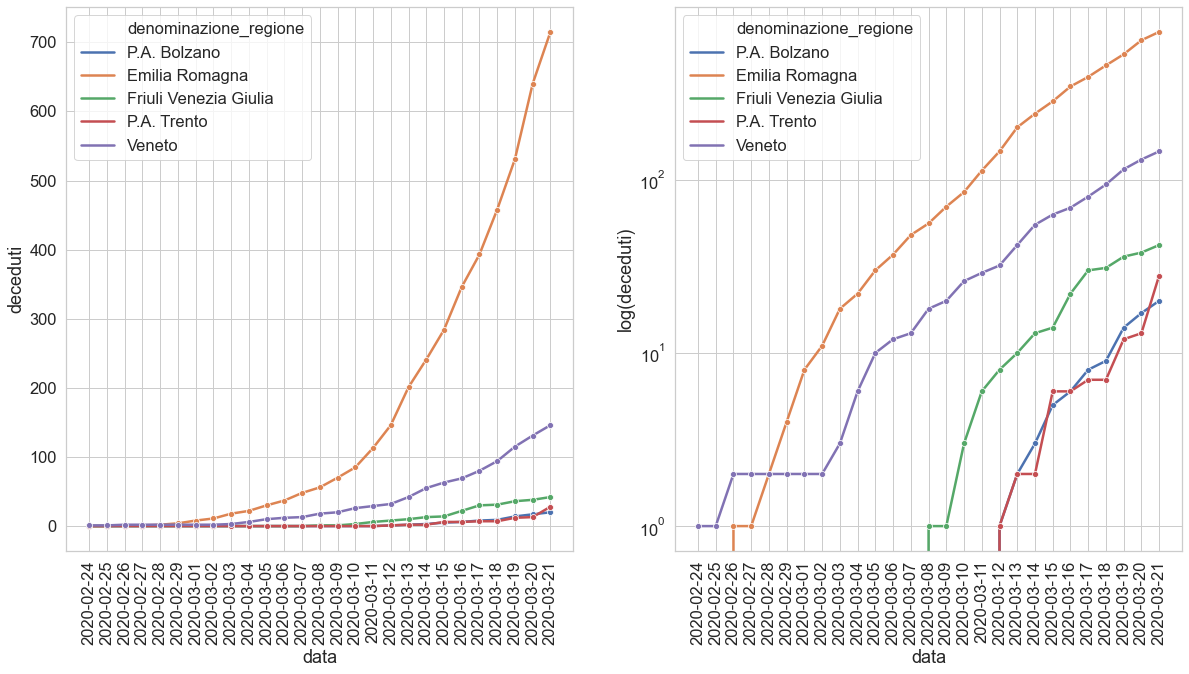

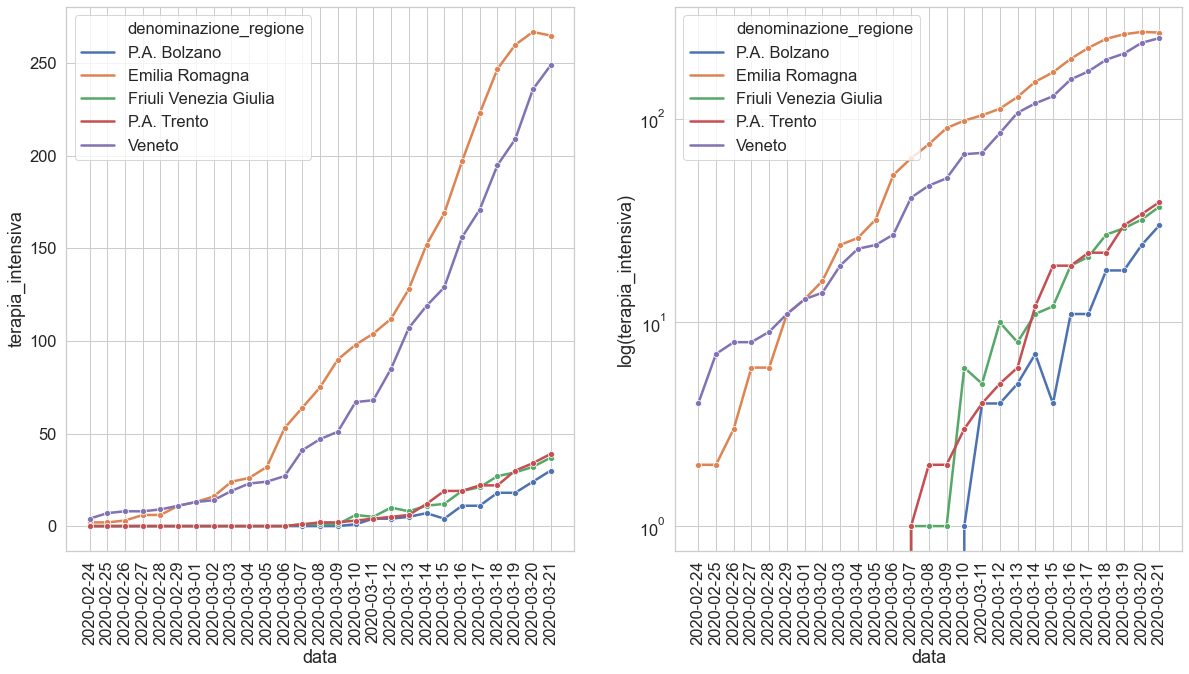

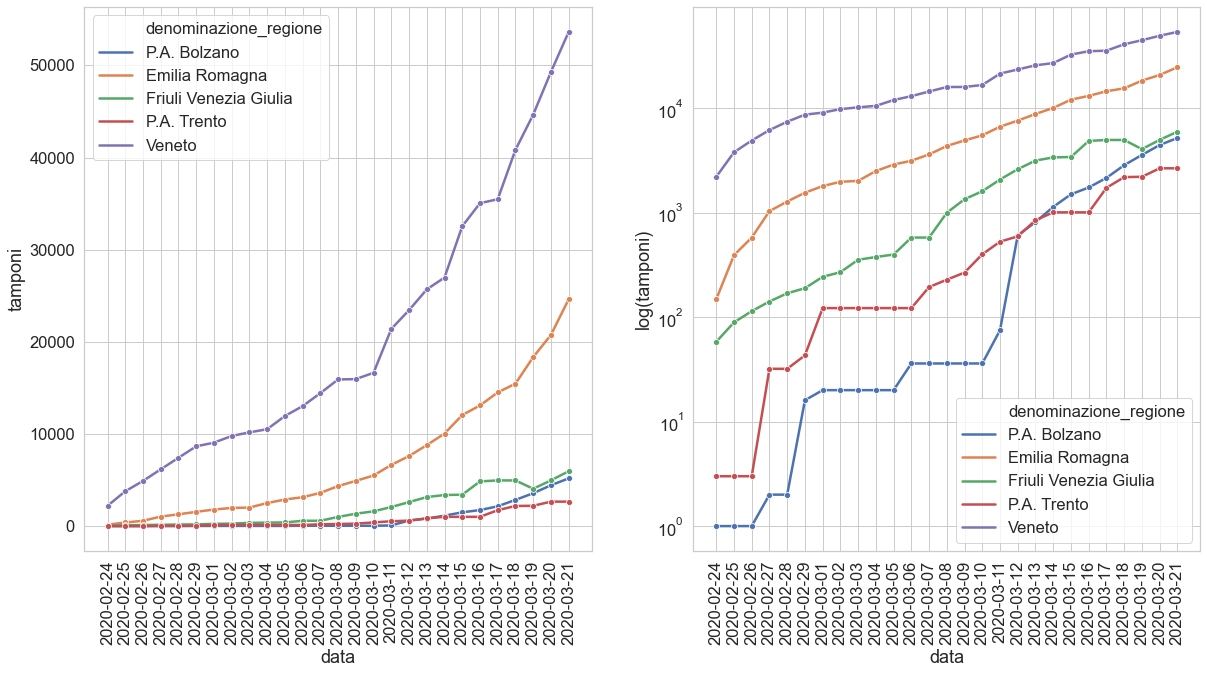

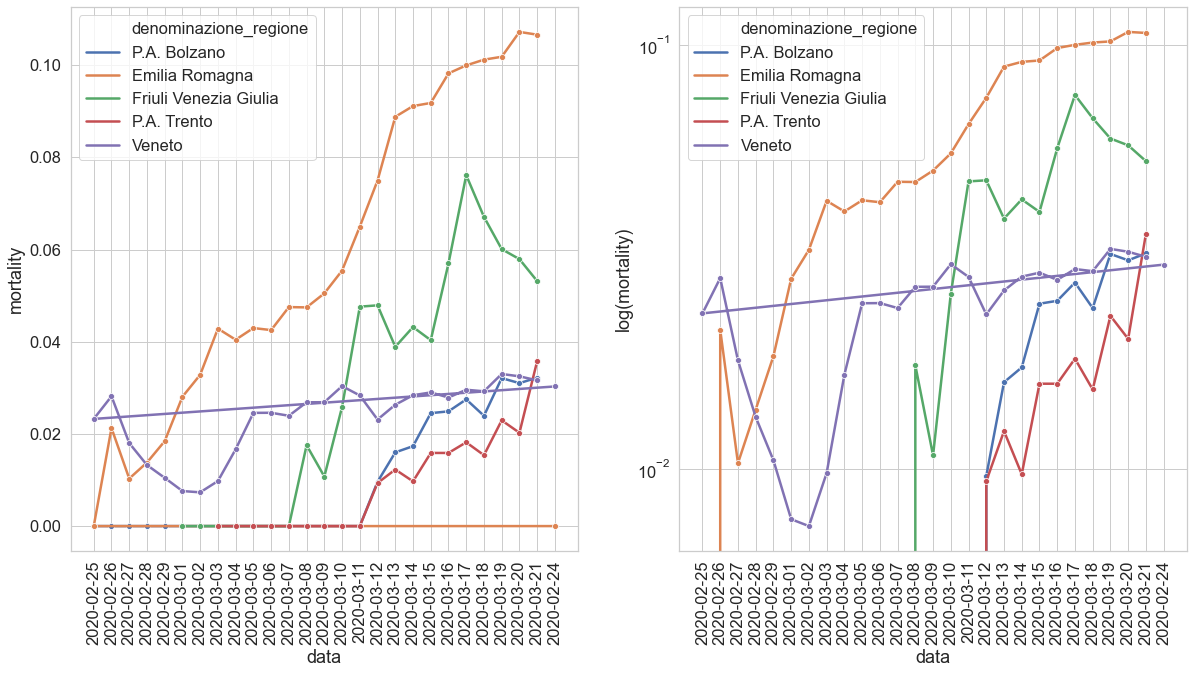

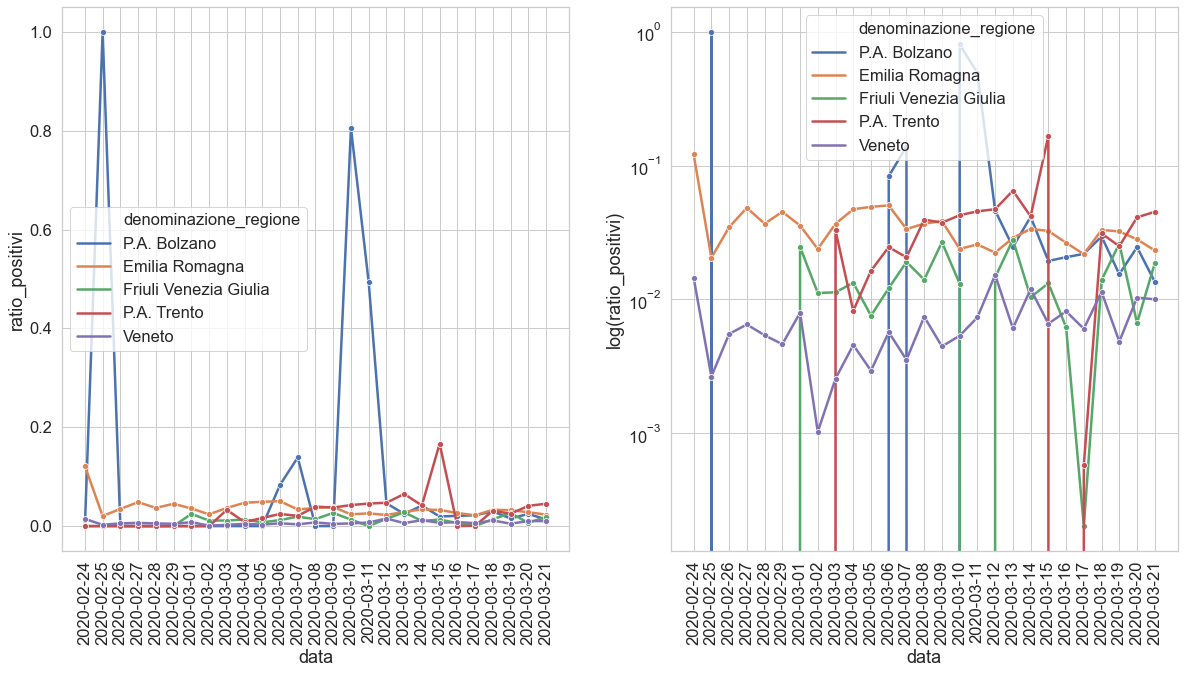

In [119]:
plot_region_indicators(NE_REGIONS)

### Growth Rates

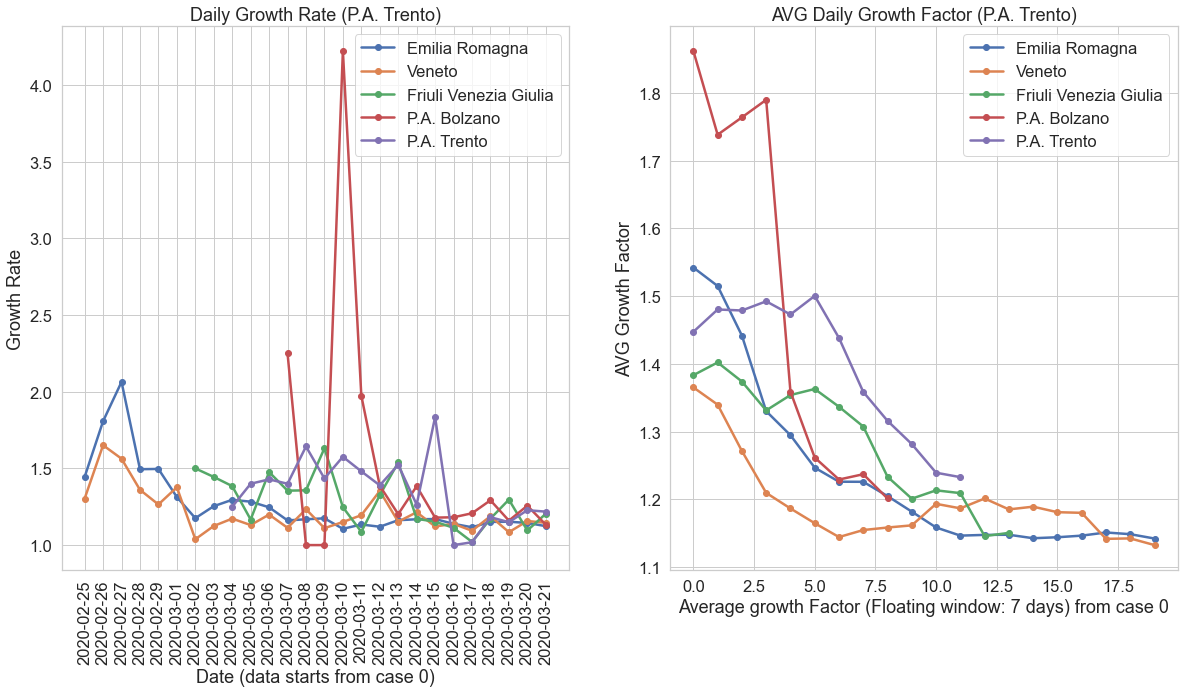

In [120]:
growth_rates(data=regions_data_json,
             areas=NE_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## Central Regions

### Trend

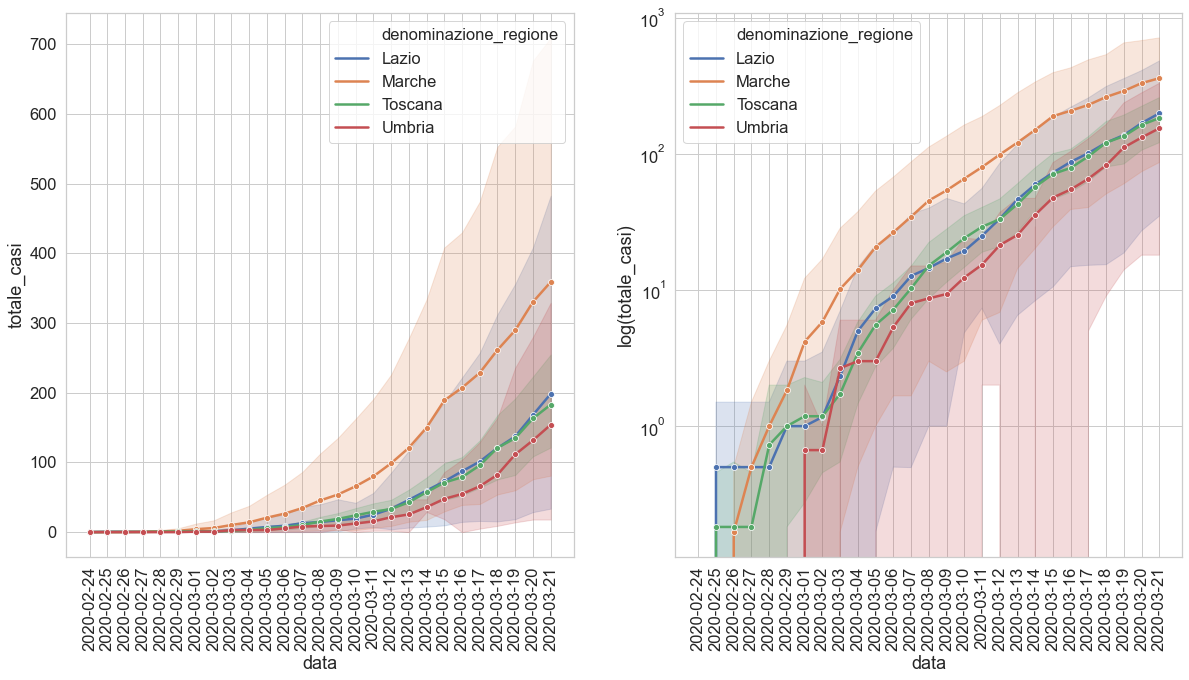

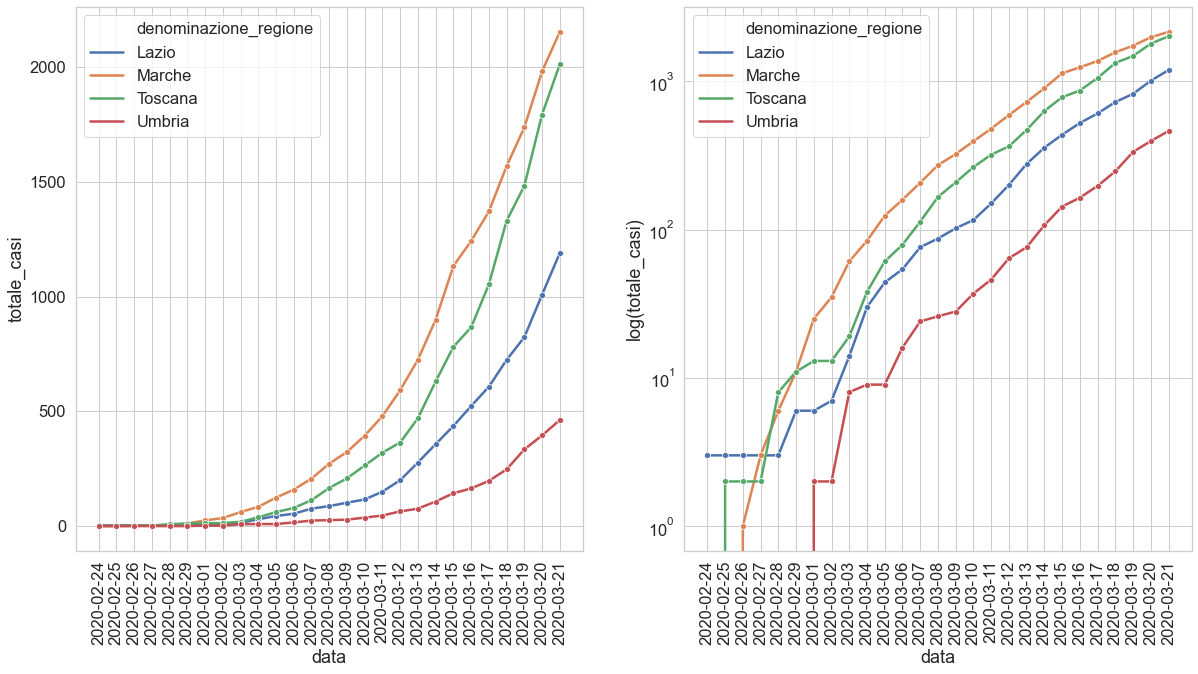

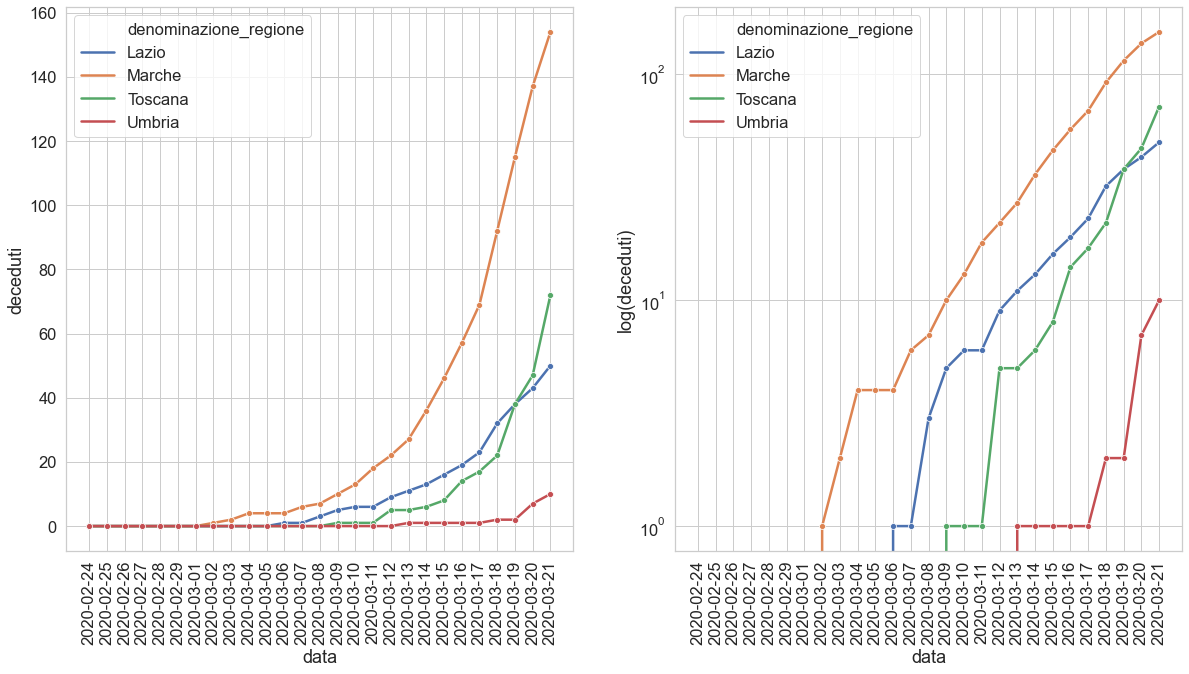

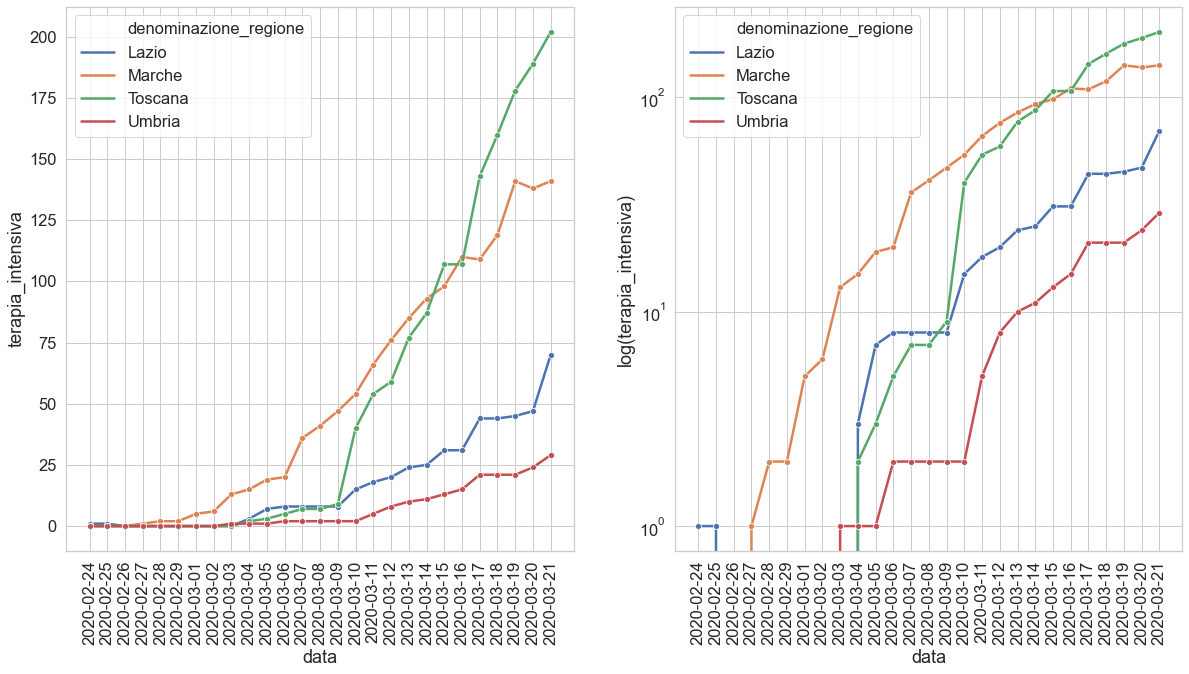

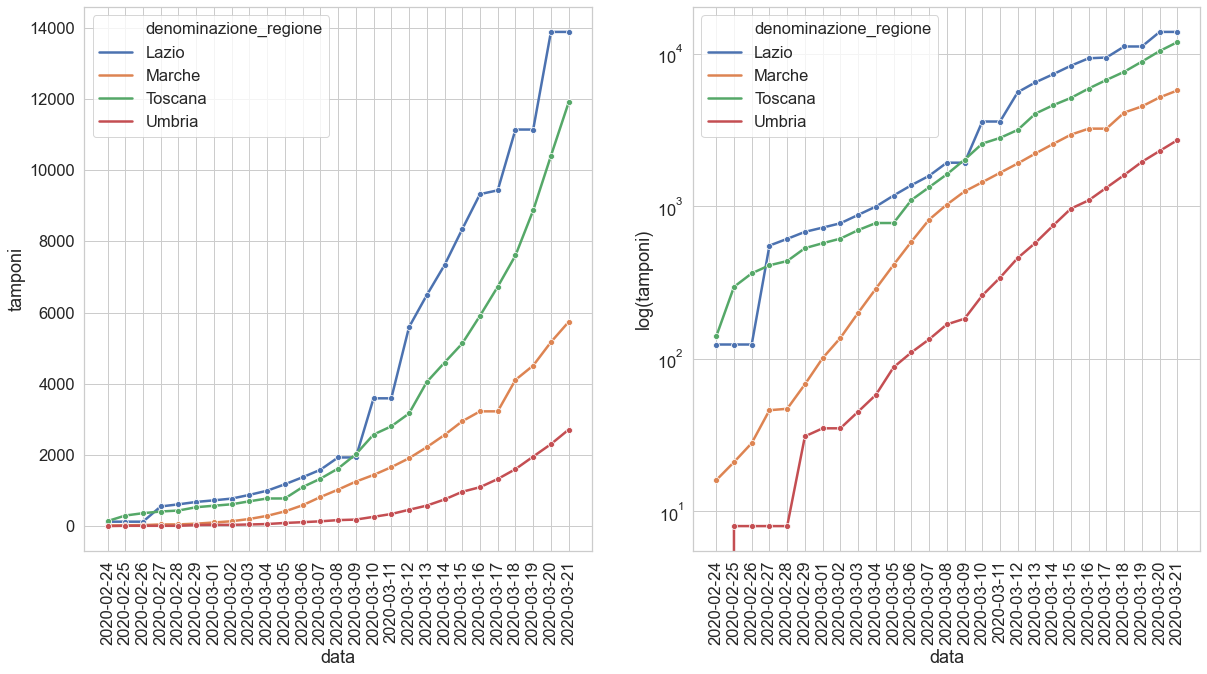

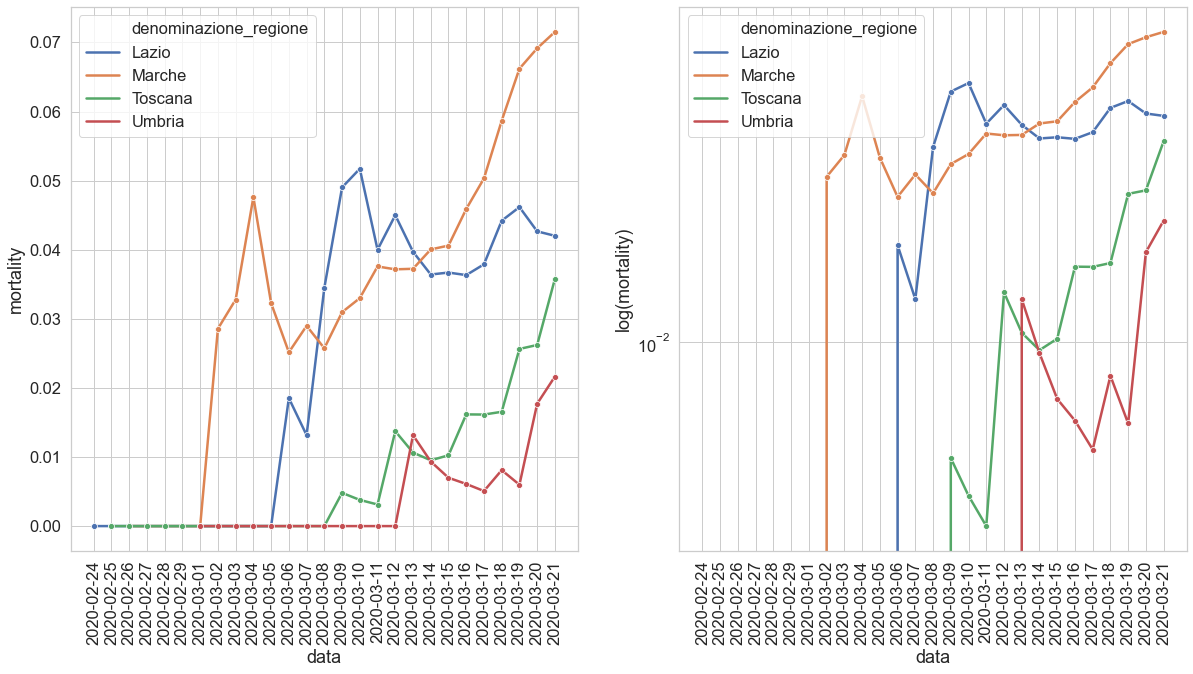

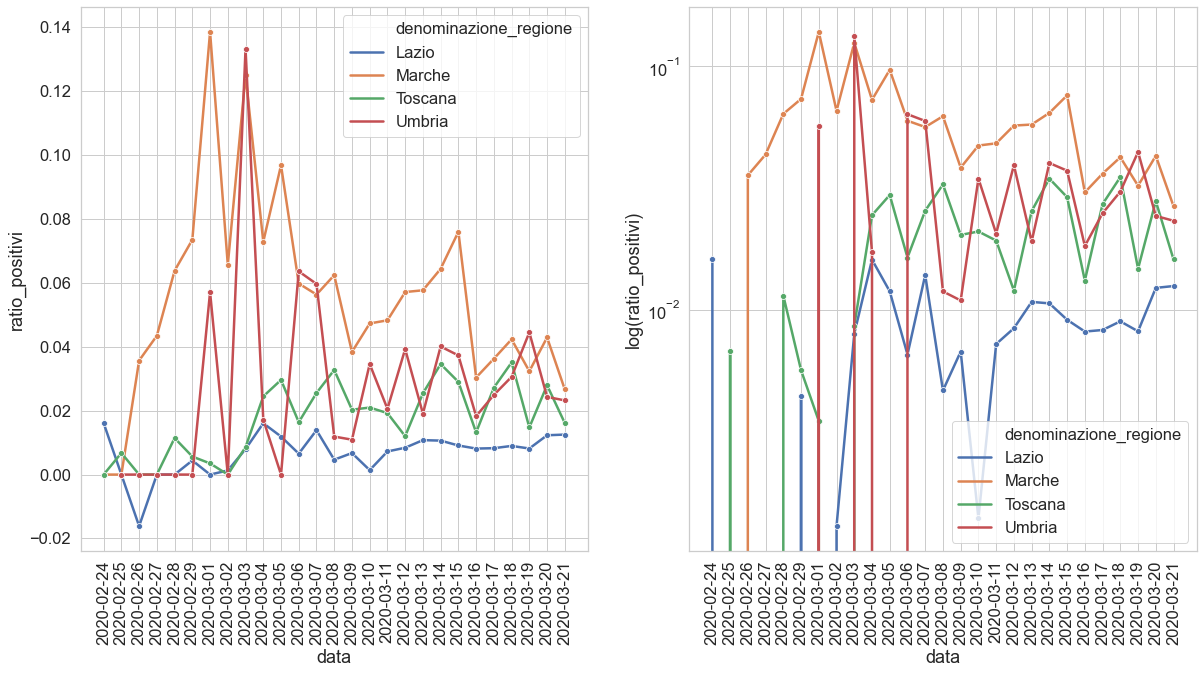

In [121]:
plot_region_indicators(C_REGIONS)

### Growth Rates

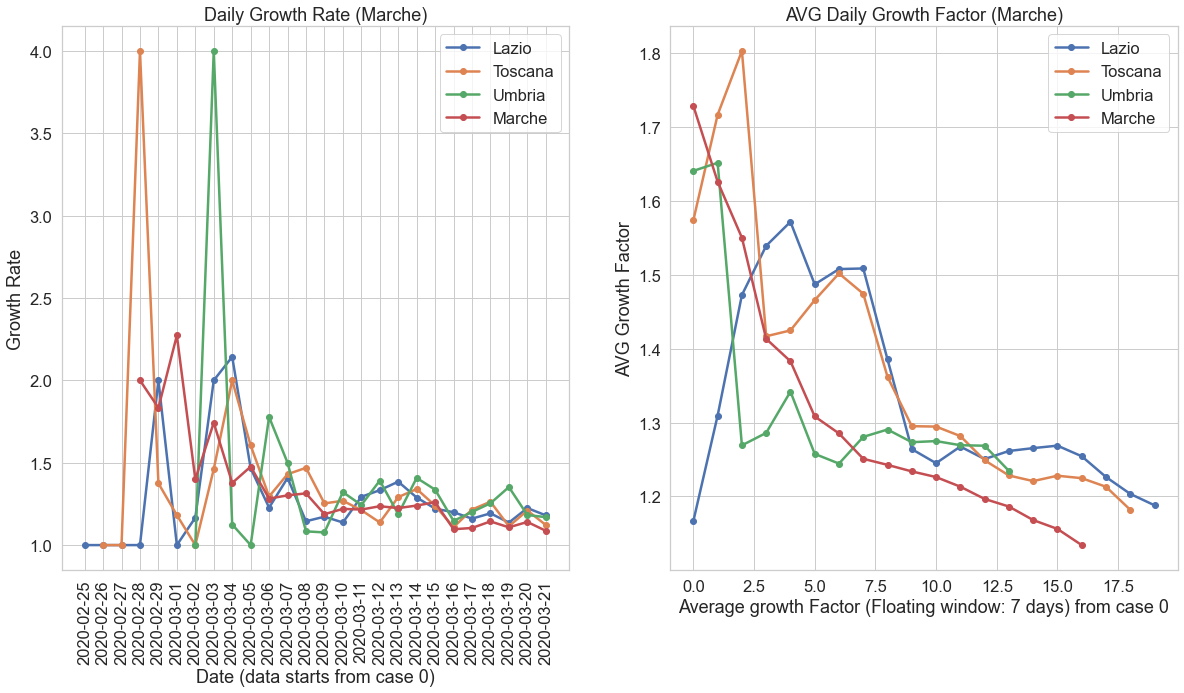

In [122]:
growth_rates(data=regions_data_json,
             areas=C_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## South Reagions

### Trend

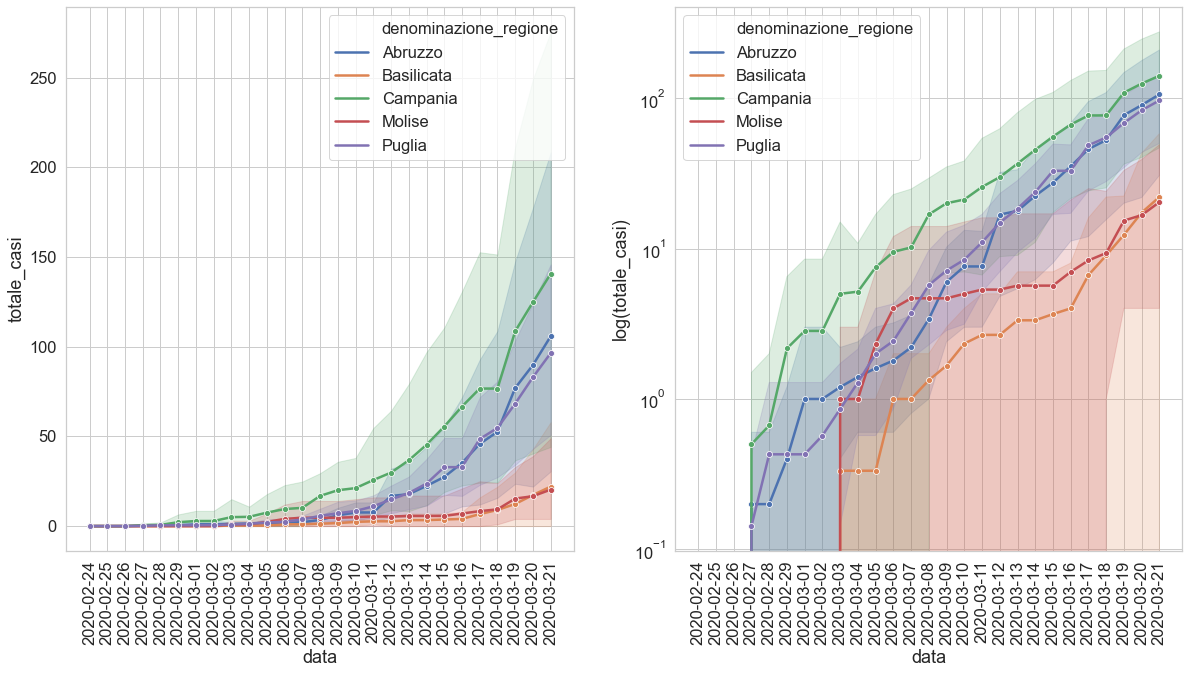

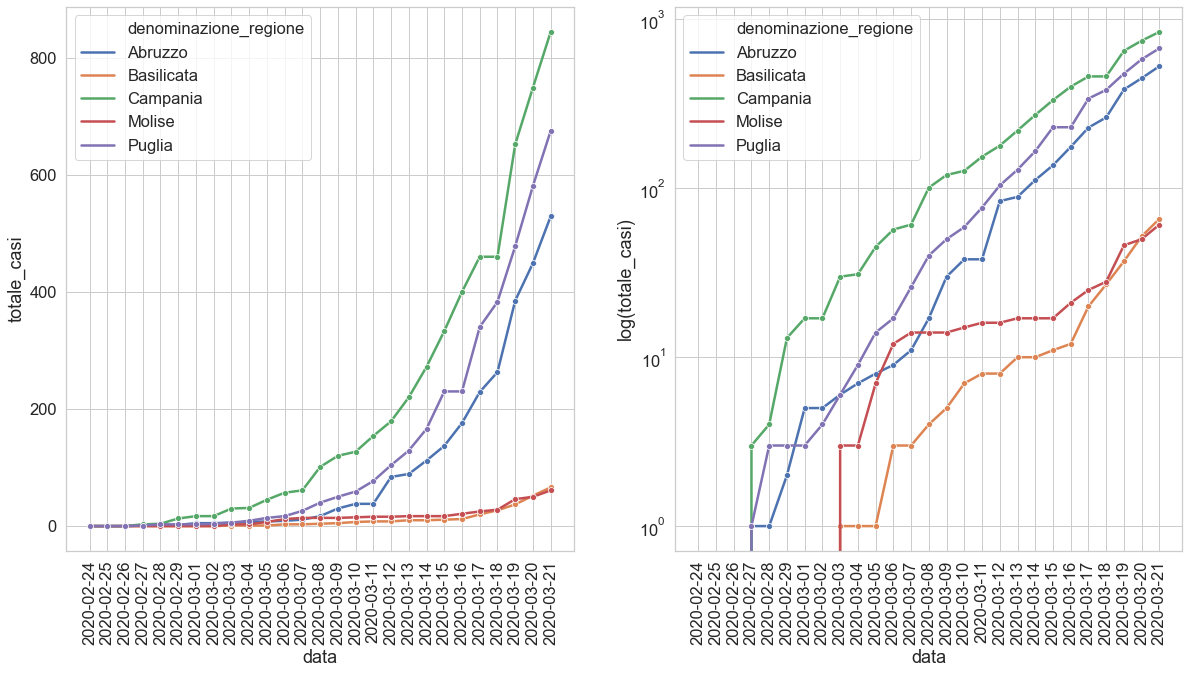

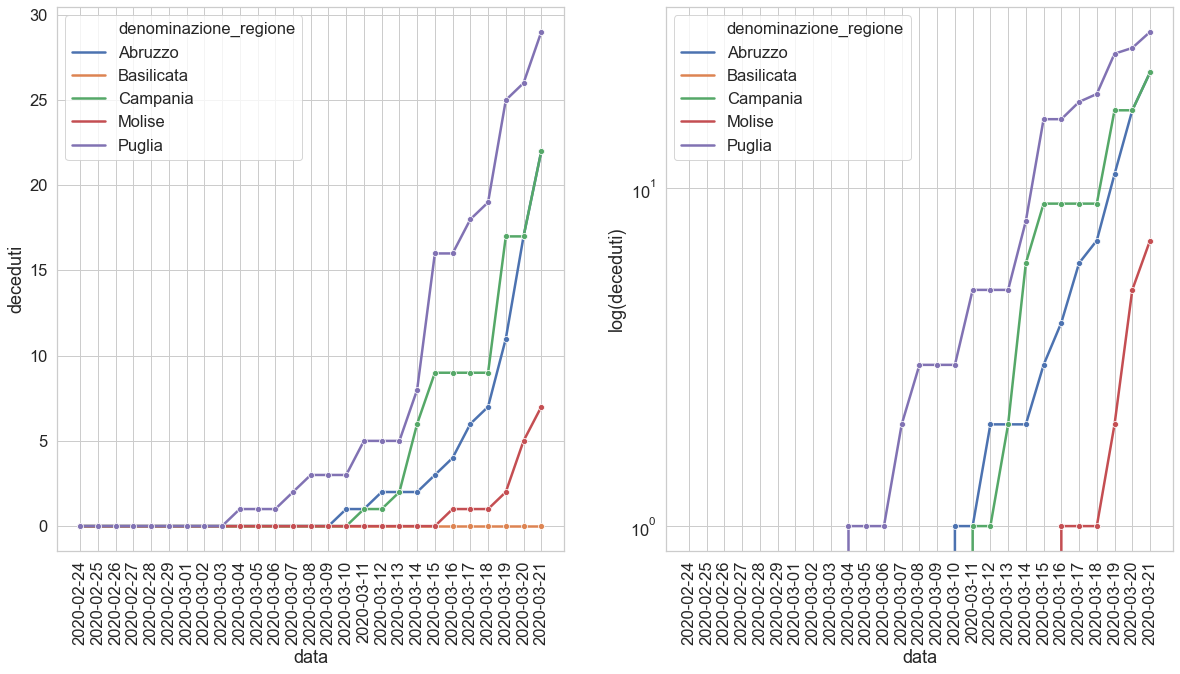

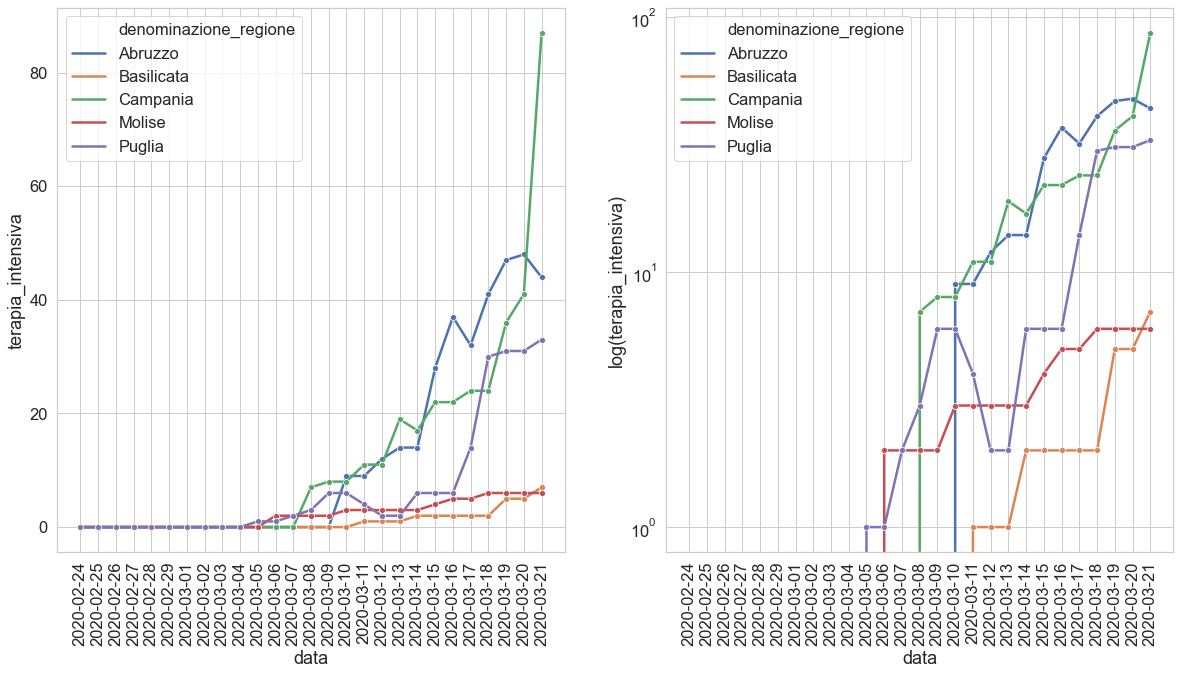

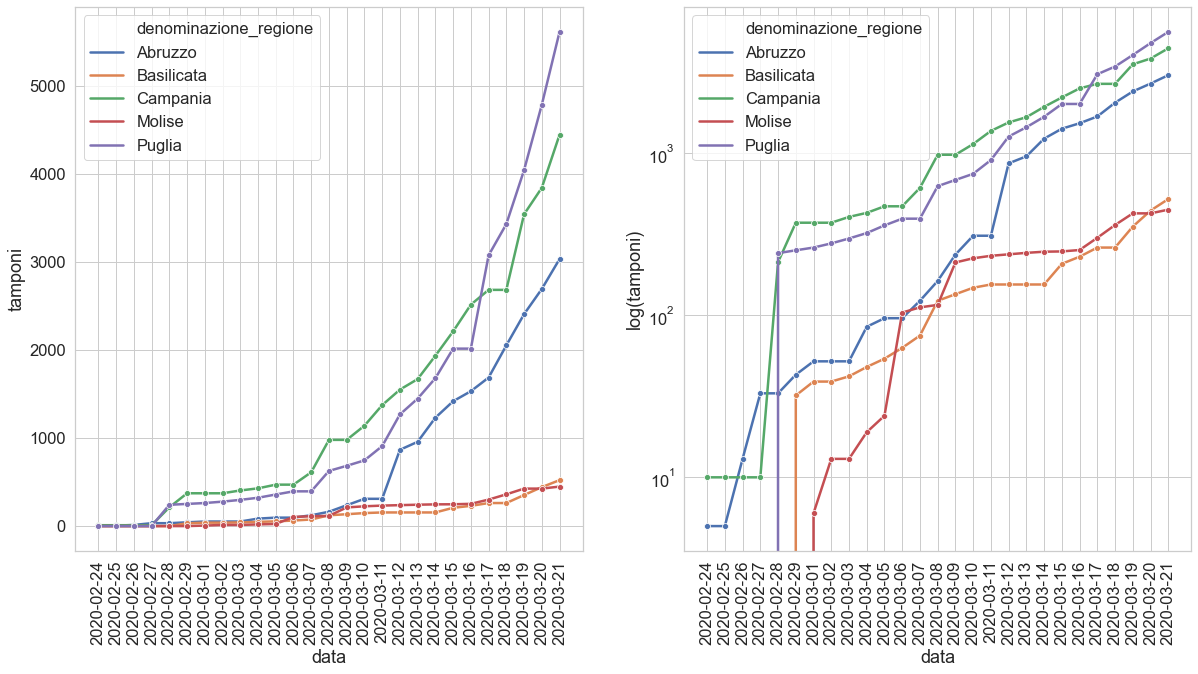

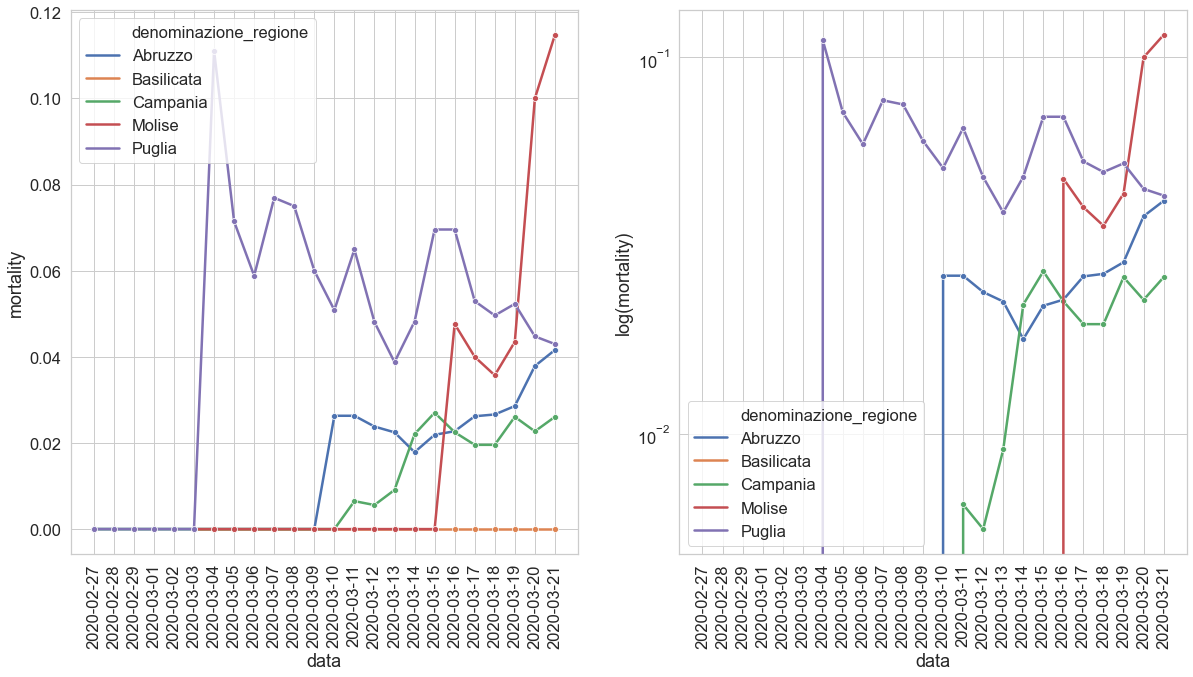

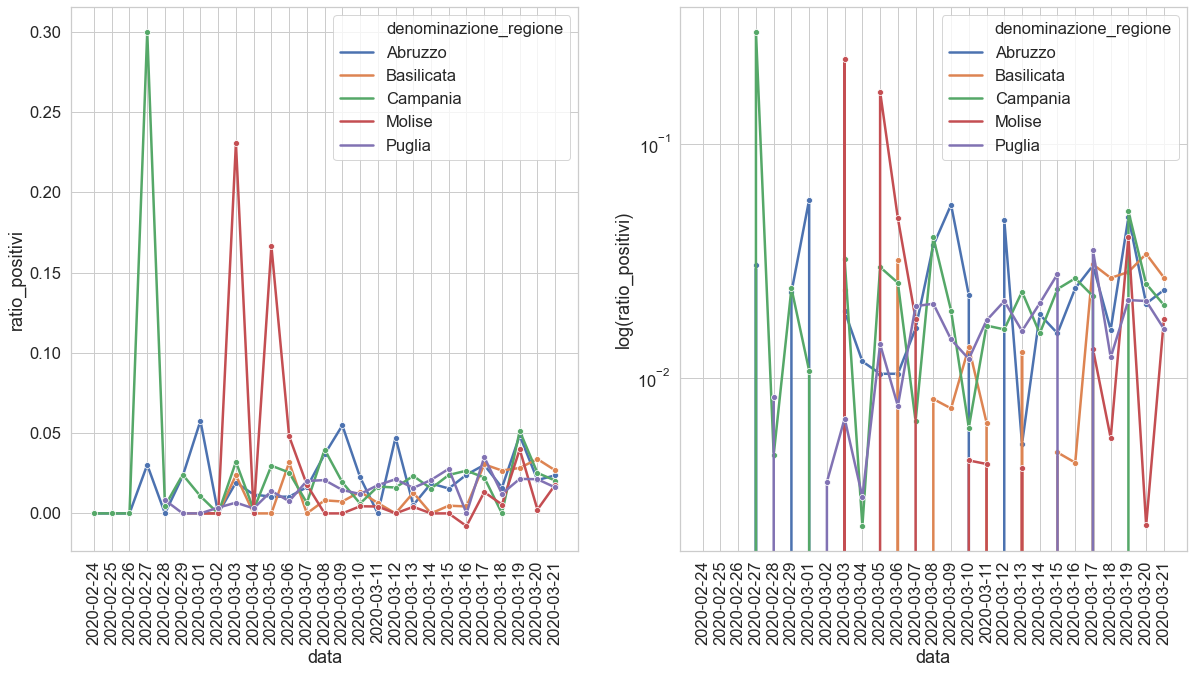

In [123]:
plot_region_indicators(S_REGIONS)

### Growth Rates

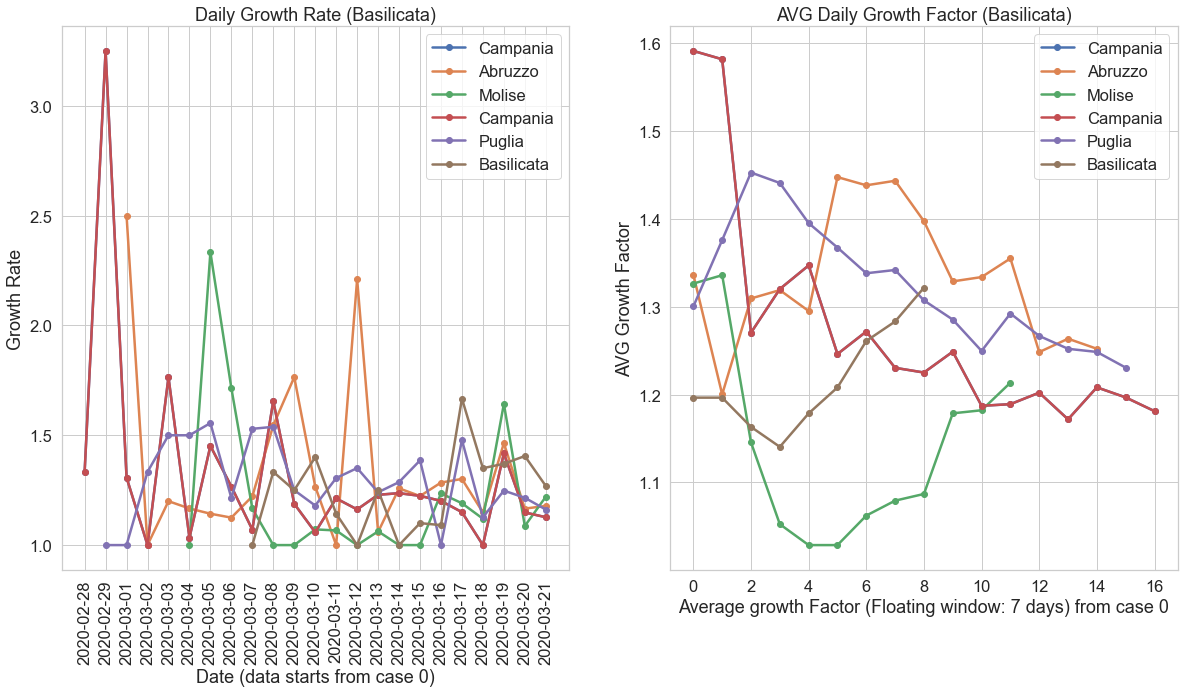

In [124]:
growth_rates(data=regions_data_json,
             areas=S_REGIONS,
             area_target='denominazione_regione',
             indicator='totale_casi')

## Islands

### Trend

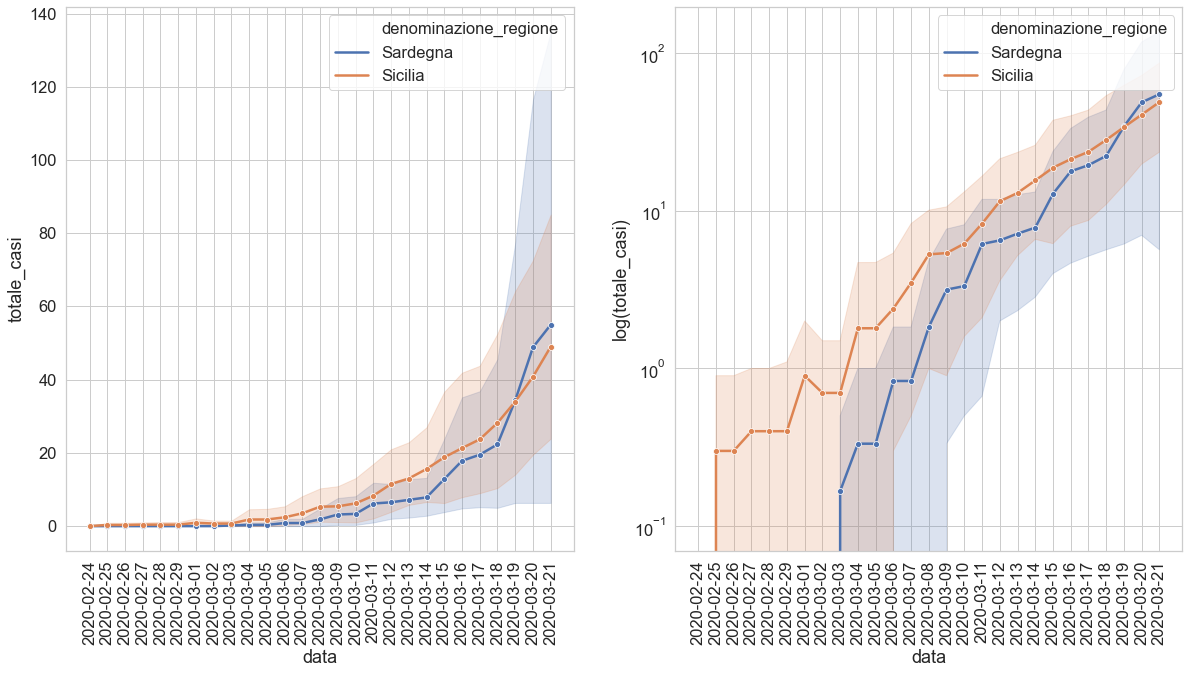

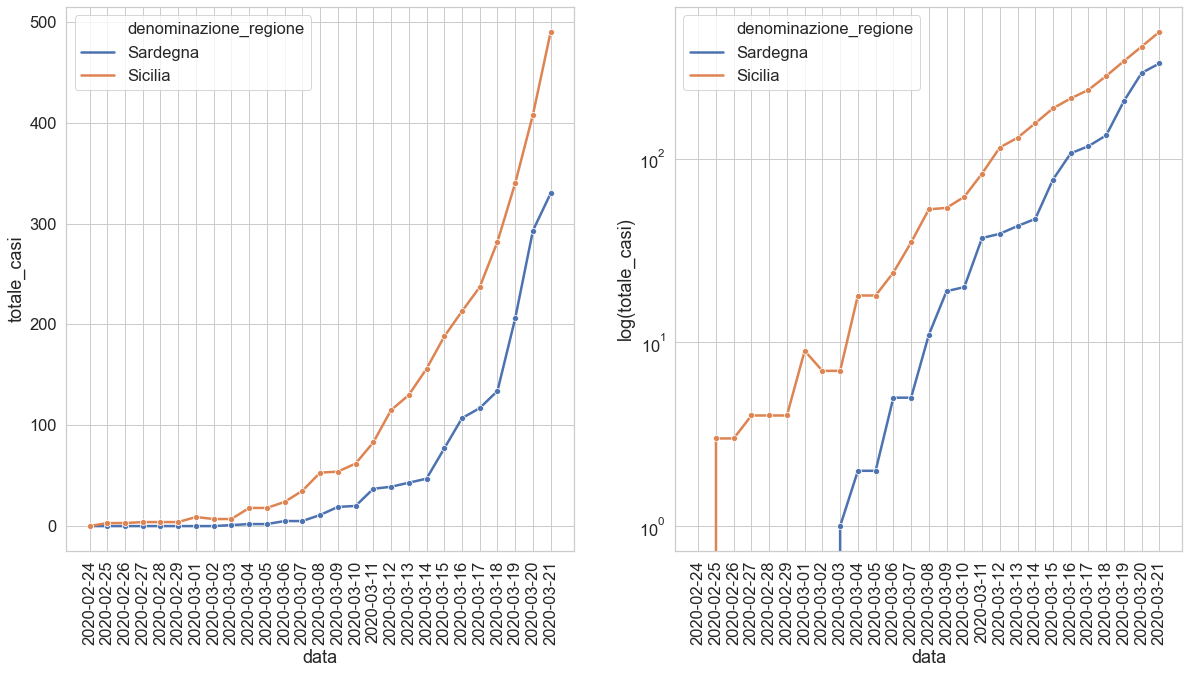

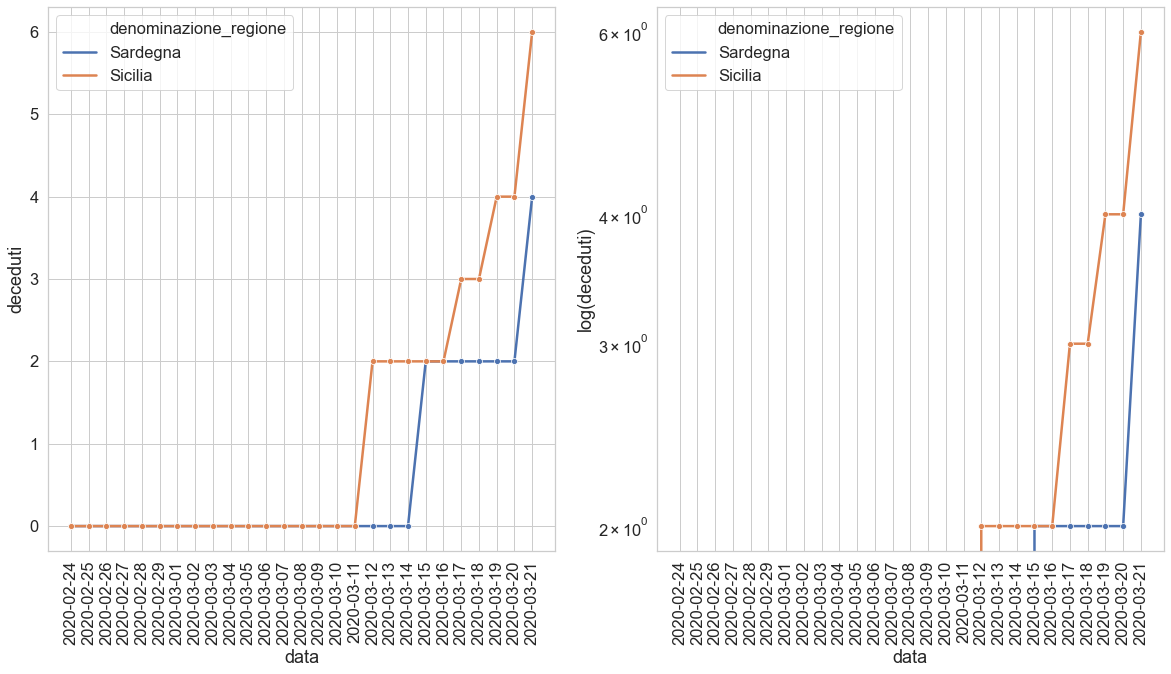

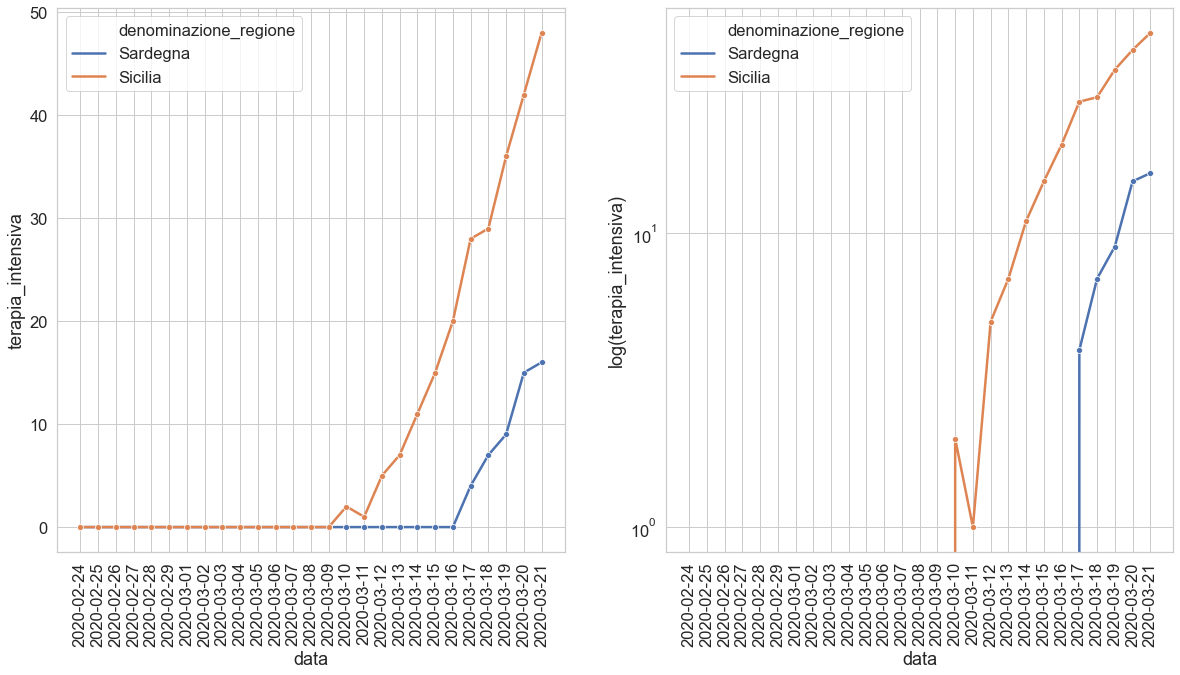

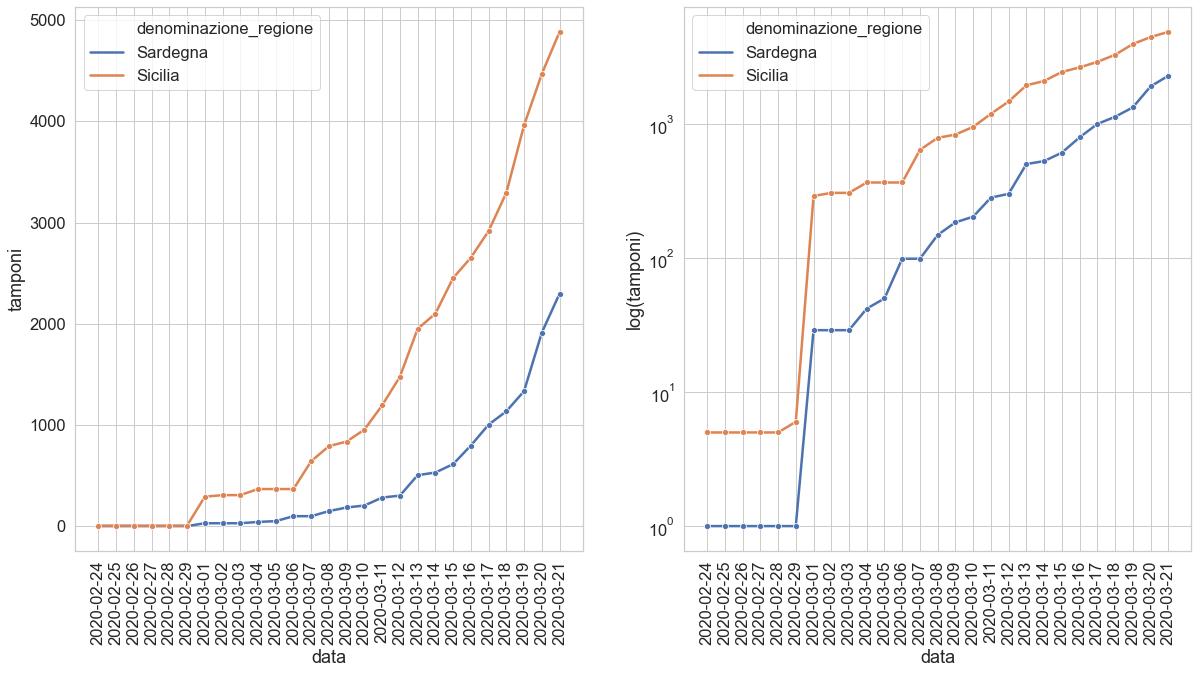

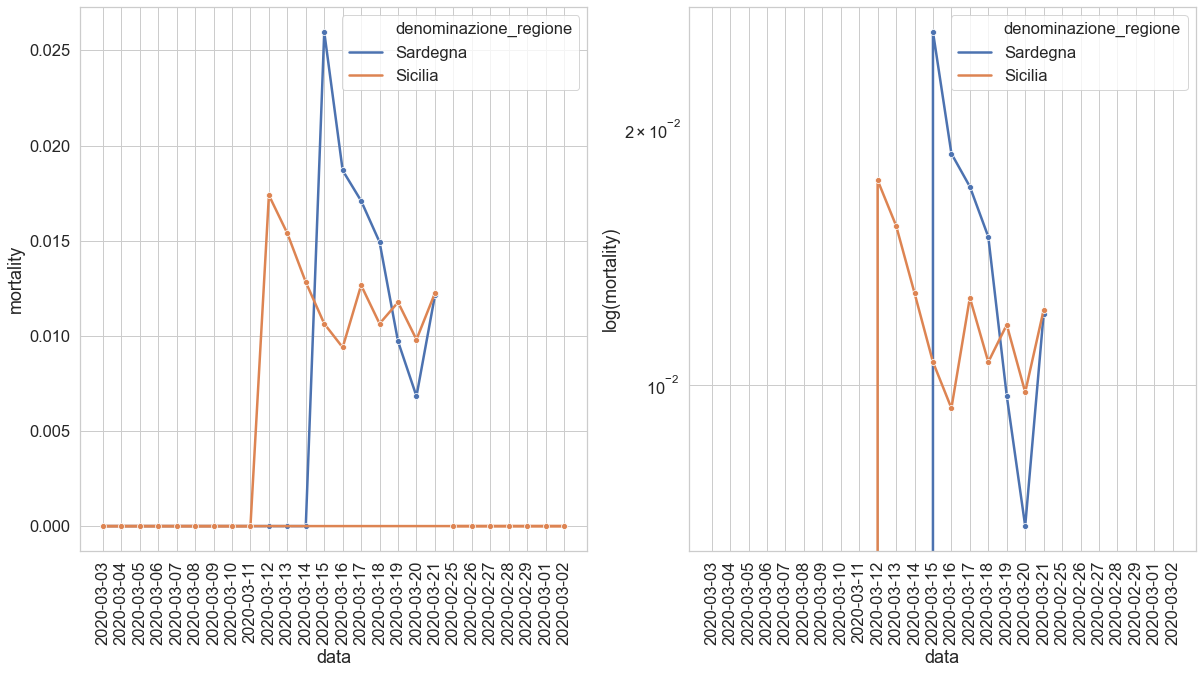

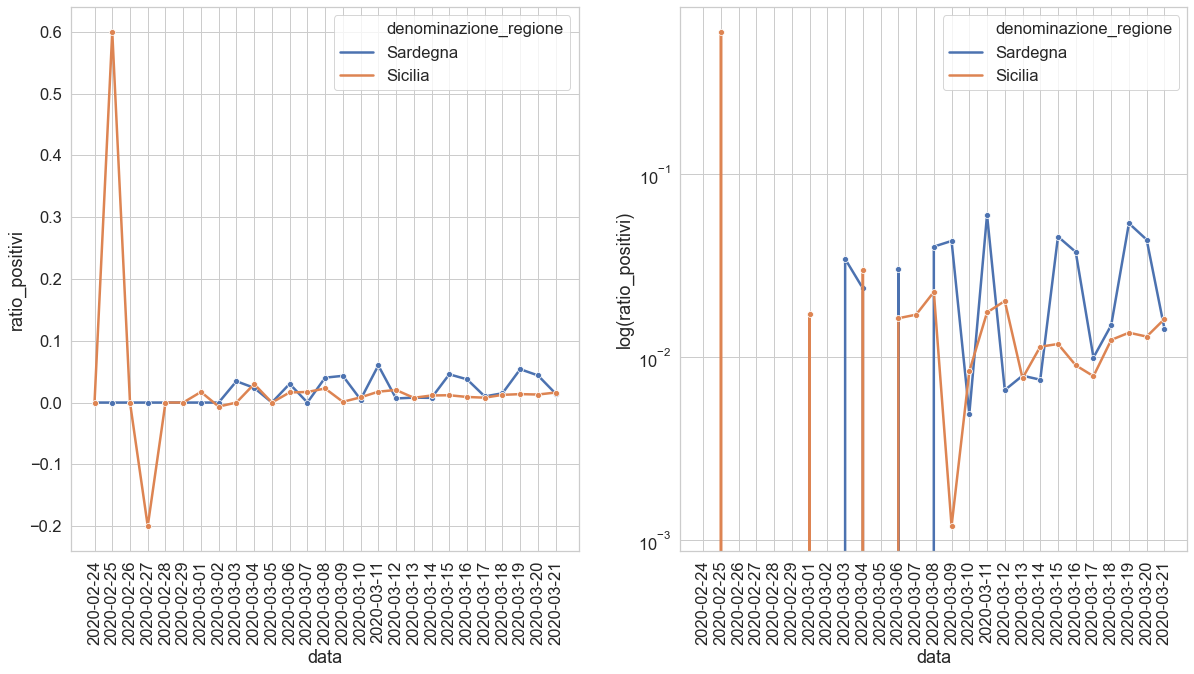

In [125]:
plot_region_indicators(ISLANDS)

### Growth Rates

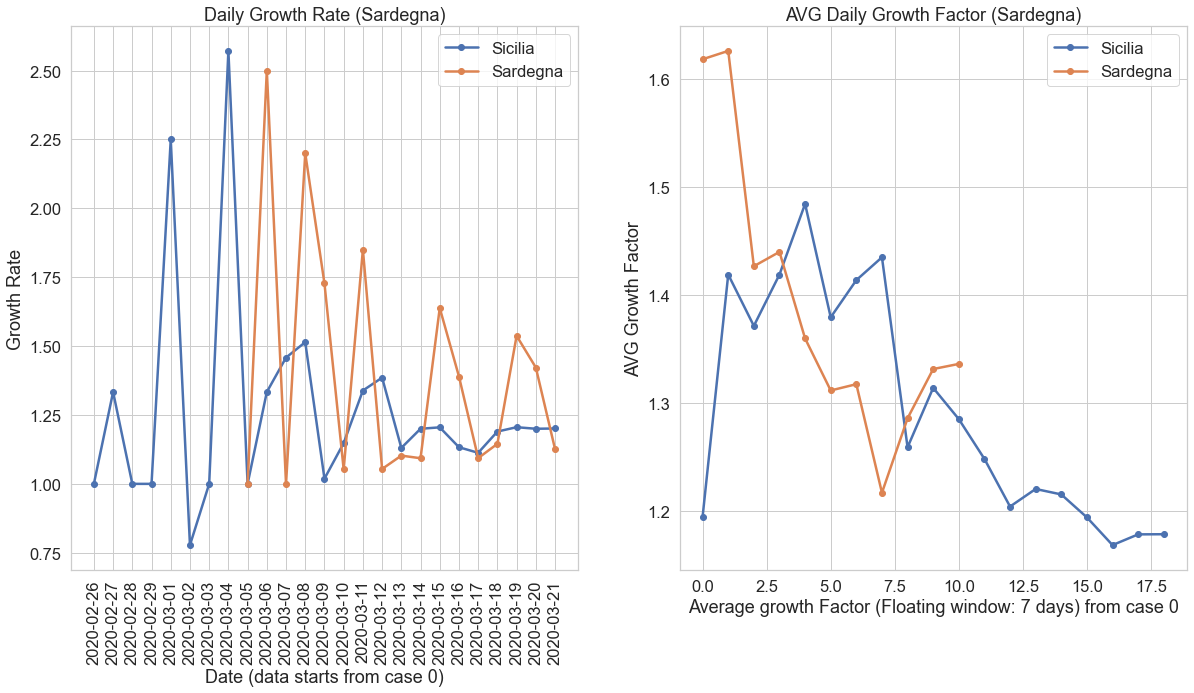

In [126]:
growth_rates(data=regions_data_json,
             areas=ISLANDS,
             area_target='denominazione_regione',
             indicator='totale_casi')

# Cities (Only Most Affected Regions)

## Lombardia

### Trend

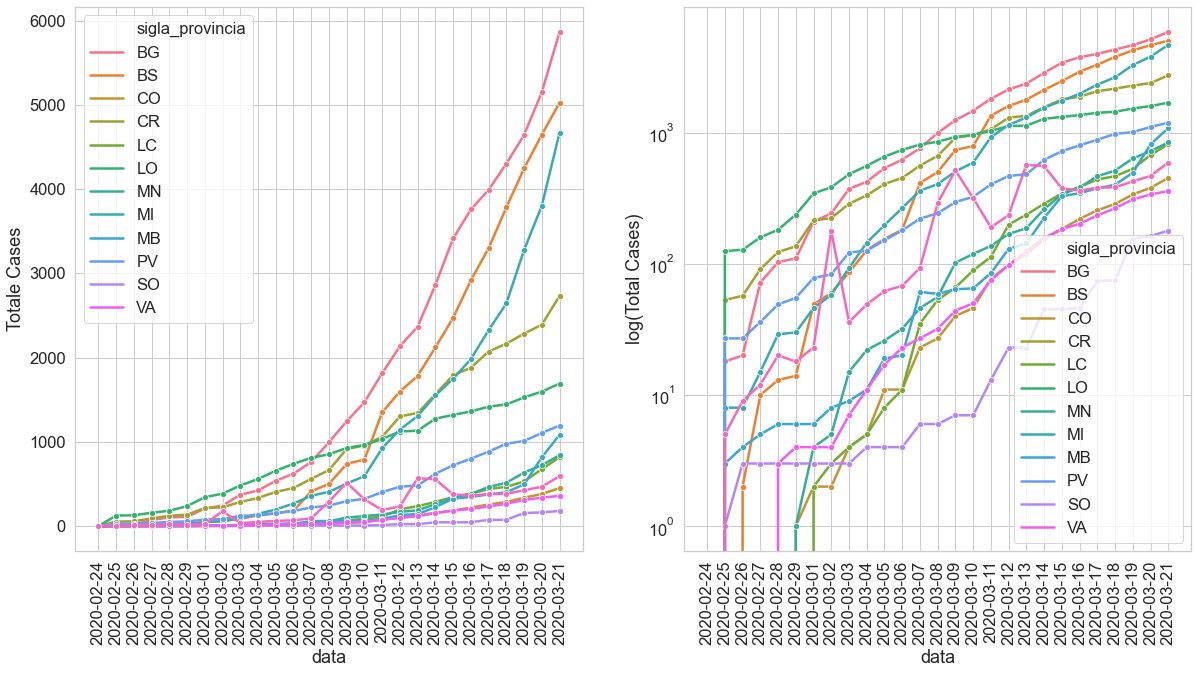

In [127]:
plot_region("Lombardia", data_json=cities_data_json)

### Growth Rates

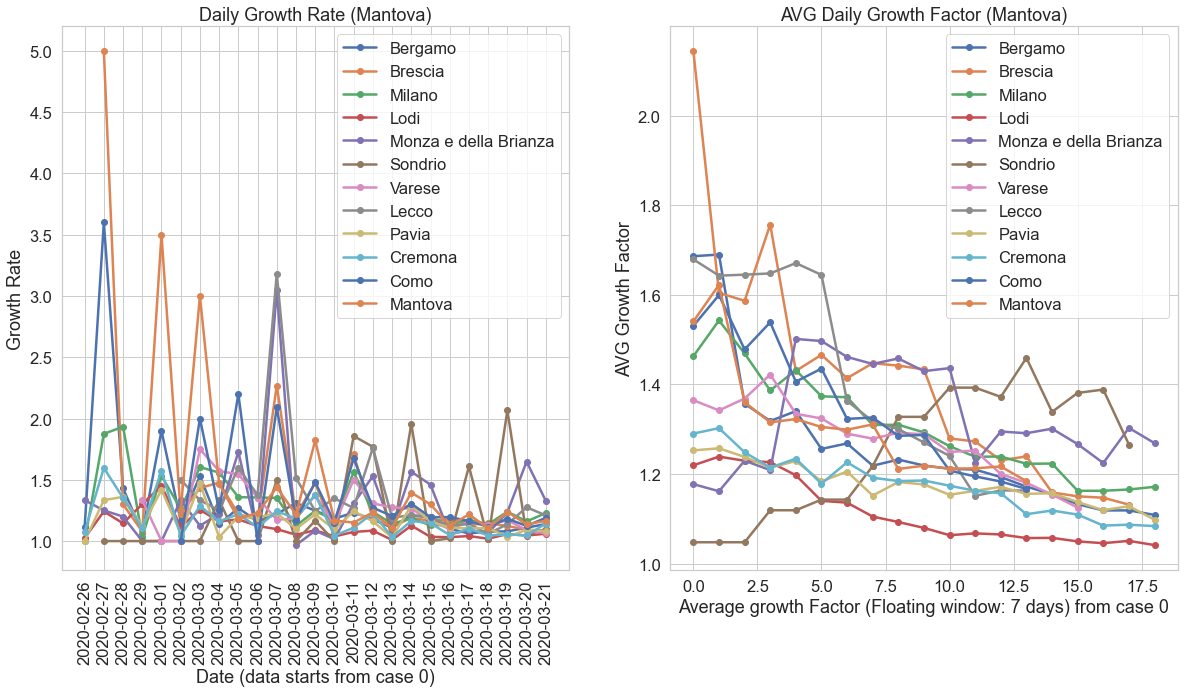

In [128]:
growth_rates(data=cities_data_json,
             areas=CITIES_LOMBARDIA,
             area_target='denominazione_provincia',
             indicator='totale_casi')

## Emilia Romagna

### Trend

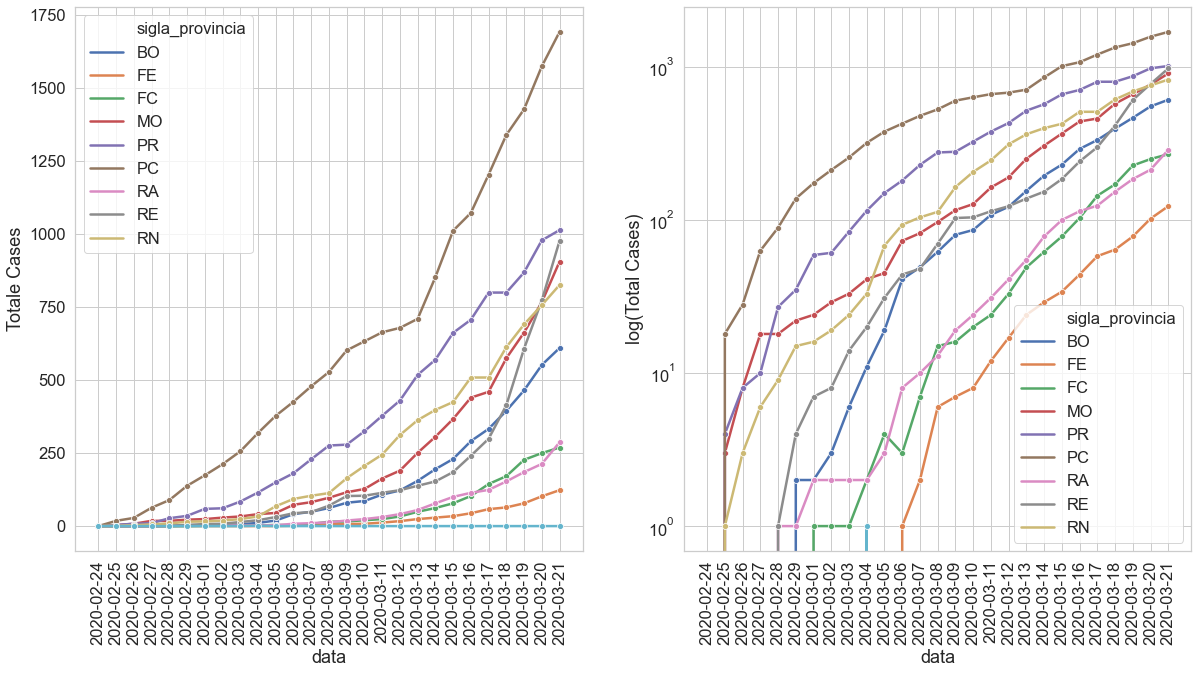

In [129]:
plot_region("Emilia Romagna", data_json=cities_data_json)

### Growth Rates

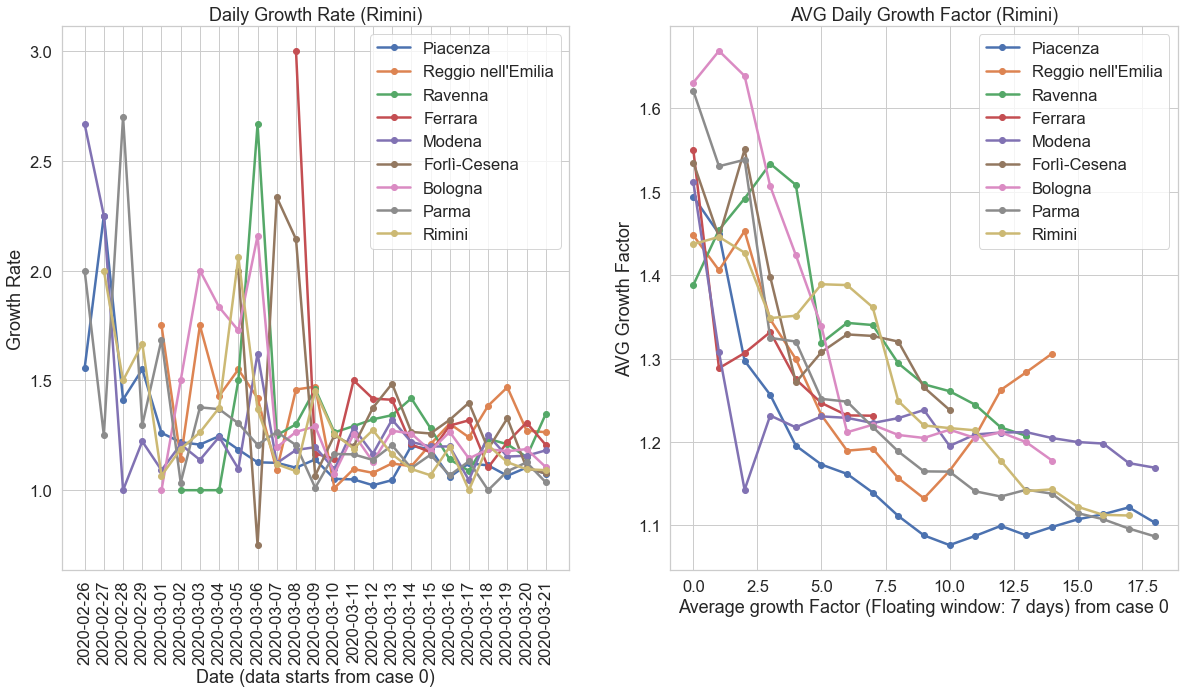

In [130]:
growth_rates(data=cities_data_json,
             areas=CITIES_EMILIA,
             area_target='denominazione_provincia',
             indicator='totale_casi')

## Veneto 

### Trend

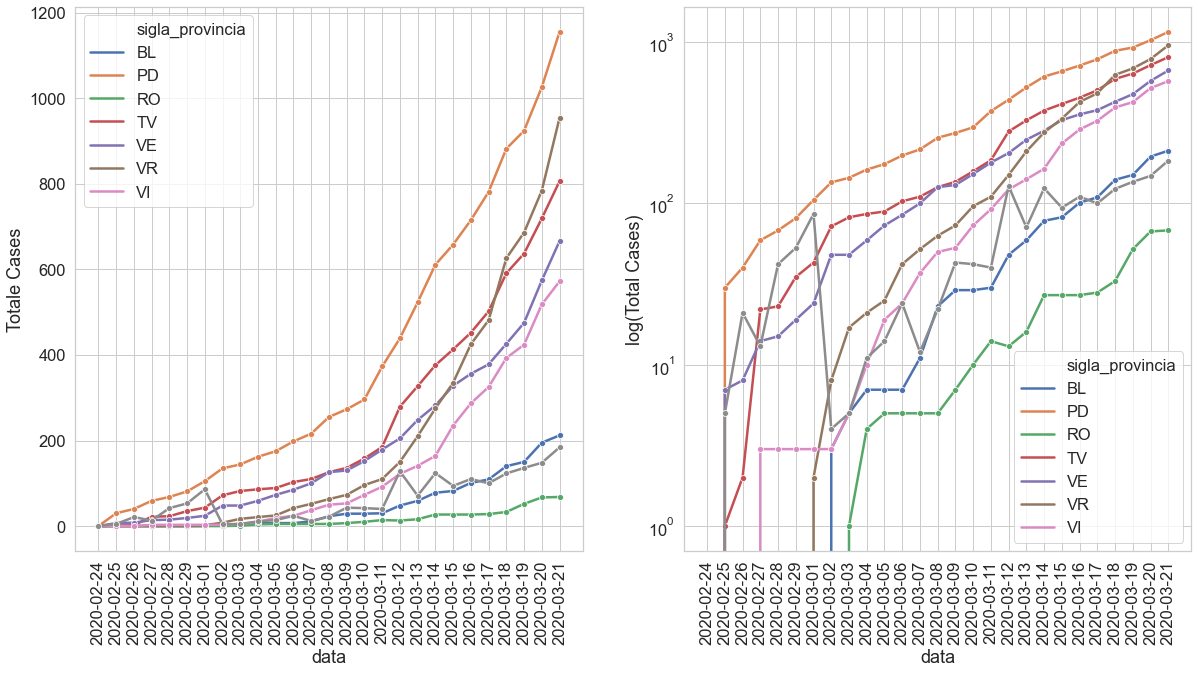

In [131]:
plot_region("Veneto", data_json=cities_data_json)

### Growth Rates

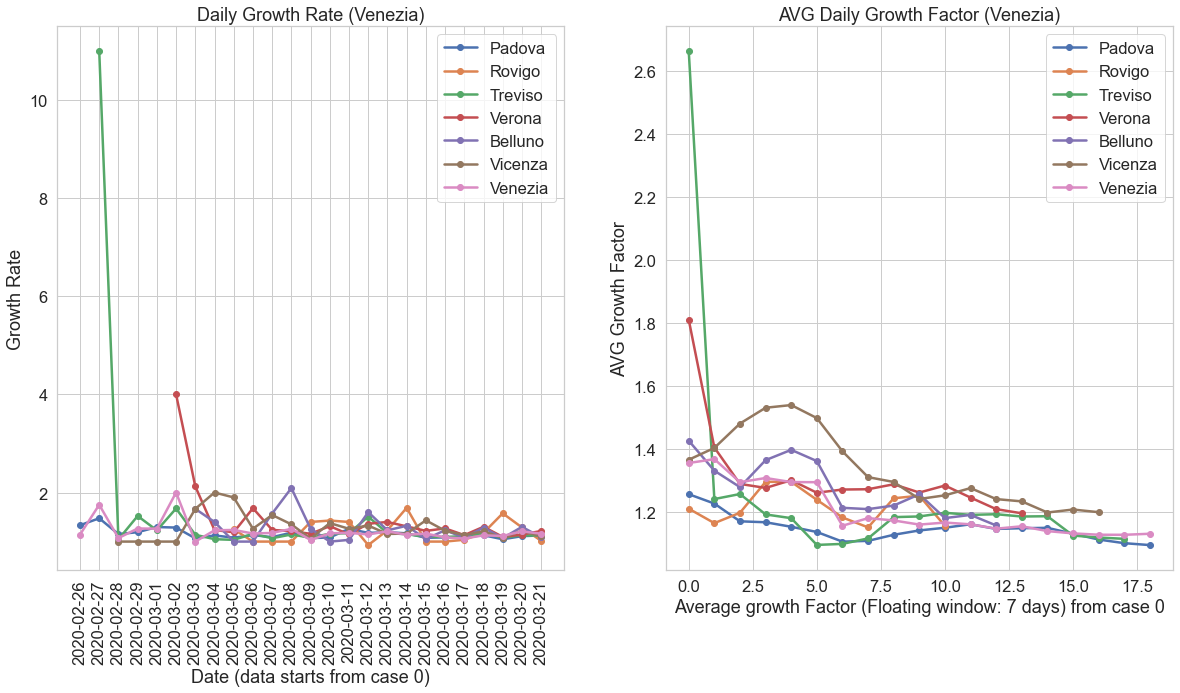

In [132]:
growth_rates(data=cities_data_json,
             areas=CITIES_VENETO,
             area_target='denominazione_provincia',
             indicator='totale_casi')

## Campania

### Trend

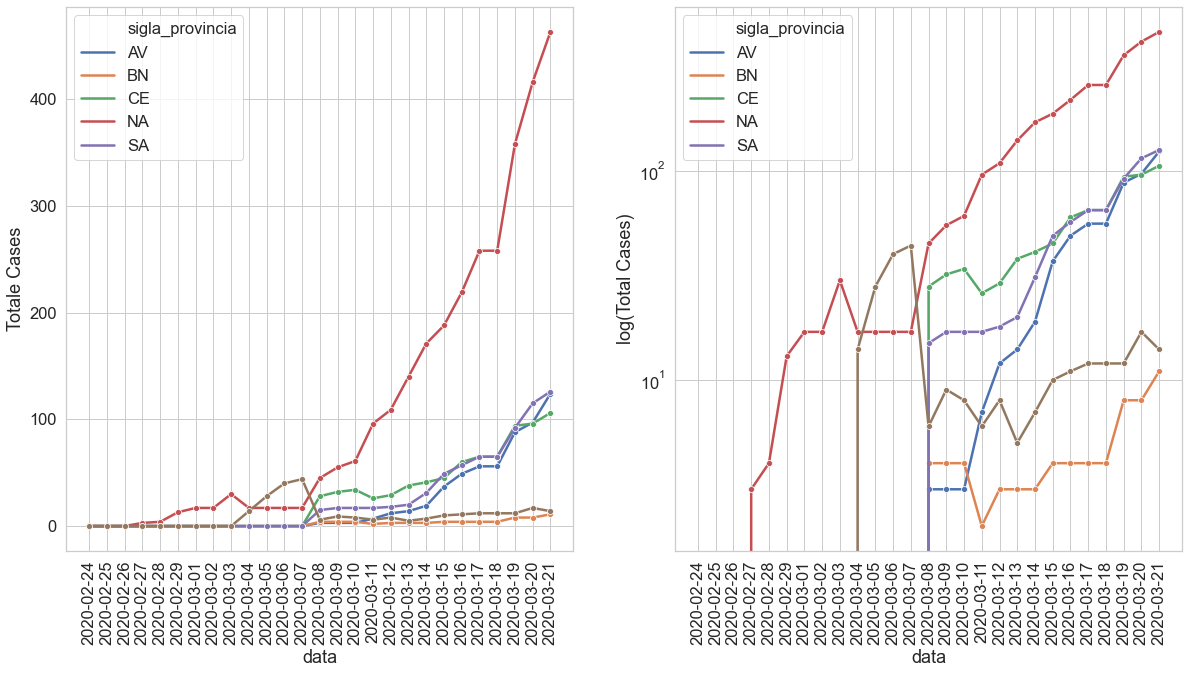

In [133]:
plot_region("Campania", data_json=cities_data_json)

### Growth Rate

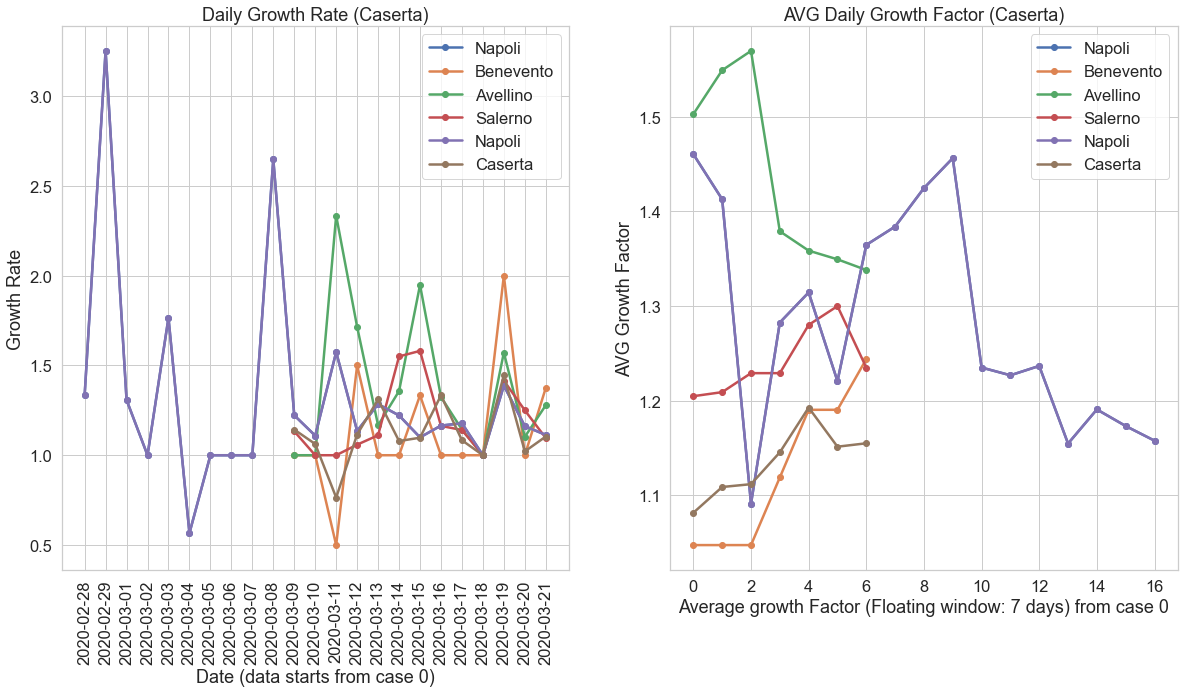

In [134]:
growth_rates(data=cities_data_json,
             areas=CITIES_CAMPANIA,
             area_target='denominazione_provincia',
             indicator='totale_casi')